In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("../")

from gcmsdataset import *
from gcmsnn import *
from gcms_dataloaders import *
from train_gcmsnn import *

In [2]:
quantum_predicted_spectra_address='../../intermediates/split_by_shunyang_prediction/quantum_predictions_spectra.bin'
fingerprints_of_quantum_predicted_address='../../intermediates/split_by_shunyang_prediction/fingerprints_quantum_predicted.bin'
prediction_style='regression'
#model_dict_address='../../results/modeldict_include_fingerprint_True_depth_4_num_dropout_0_prediction_style_regression_learning_rate_0.0001.bin'
model_dict_address='../../results/20_modeldict_include_fingerprint_True_depth_4_num_dropout_0_prediction_style_regression_learning_rate_0.0001.bin'         

In [3]:
quantum_predicted_spectra_panda=pd.read_pickle(quantum_predicted_spectra_address)

In [4]:
fingerprints_of_quantum_predicted_panda=pd.read_pickle(fingerprints_of_quantum_predicted_address)

In [5]:
fingerprints_of_quantum_predicted_panda.columns

Index(['inchikey_first_block', 'Kovats-RI-est', 'molecular_weight',
       'spectrum_np', 'morgan_fingerprints', 'computed_rdkit_mol'],
      dtype='object')

In [6]:
quantum_predicted_spectra_panda.columns

Index(['Database No.', 'name', 'Inchikey ', 'Short', 'number of atoms', 'Mass',
       'Match', 'R.match', 'Prob', 'Rank', 'Time in Seconds', 'RBN', 'RBF',
       'PHI', 'N/O', 'high/low hinderance ', 'Dot', 'Cos',
       'In-silico spectrum', 'spectrum_np'],
      dtype='object')

In [7]:
fingerprints_of_quantum_predicted_panda=fingerprints_of_quantum_predicted_panda.loc[
    :,
    ['inchikey_first_block','morgan_fingerprints']
]

In [8]:
quantum_predicted_spectra_panda=quantum_predicted_spectra_panda.loc[
    :,
    ['Short','spectrum_np']
]

In [9]:
fingerprints_of_quantum_predicted_panda

,inchikey_first_block,morgan_fingerprints
20,UXTUIDNFTDLRIX,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
52,RGBVWCQARBEPPW,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
61,WMYNMYVRWWCRPS,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
67,JNYASWYZHOGSHZ,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
69,MDHZLHGRJCMNLA,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
164431,CERXFJHZAWSIBN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
179428,QYZUXPQHBRUDQD,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
205819,XPMPUGVKPUCKNN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
215691,VWAIZPYLEYEEFK,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [10]:
quantum_predicted_spectra_panda

,Short,spectrum_np
0,RGBVWCQARBEPPW,"[[26.0, 0.68], [27.0, 0.01], [53.0, 0.01], [54..."
1,UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.14], [28.0, 0.03], [29..."
2,UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.27], [28.0, 0.02], [29..."
3,OECTYKWYRCHAKR,"[[14.0, 0.02], [27.0, 0.68], [28.0, 0.12], [29..."
4,WMYNMYVRWWCRPS,"[[28.0, 0.01], [29.0, 1.0], [30.0, 0.02], [42...."
...,...,...
446,JCHUCGKEGUAHEH,"[[15.0, 0.07], [27.0, 0.11], [28.0, 0.03], [29..."
447,JKFAIQOWCVVSKC,"[[40.0, 0.01], [43.0, 1.0], [44.0, 0.01]]"
448,QWENRTYMTSOGBR,"[[14.0, 0.03], [28.0, 0.41], [40.0, 0.02], [41..."
449,NSPMIYGKQJPBQR,"[[29.0, 1.0], [40.0, 0.18], [41.0, 0.06], [42...."


In [11]:
total_panda_for_similarity=fingerprints_of_quantum_predicted_panda.merge(
    right=quantum_predicted_spectra_panda,
    left_on='inchikey_first_block',
    right_on='Short',
    how='inner'
)

In [12]:
total_panda_for_similarity

,inchikey_first_block,morgan_fingerprints,Short,spectrum_np
0,UXTUIDNFTDLRIX,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.14], [28.0, 0.03], [29..."
1,UXTUIDNFTDLRIX,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.27], [28.0, 0.02], [29..."
2,RGBVWCQARBEPPW,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RGBVWCQARBEPPW,"[[26.0, 0.68], [27.0, 0.01], [53.0, 0.01], [54..."
3,WMYNMYVRWWCRPS,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",WMYNMYVRWWCRPS,"[[28.0, 0.01], [29.0, 1.0], [30.0, 0.02], [42...."
4,JNYASWYZHOGSHZ,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",JNYASWYZHOGSHZ,"[[27.0, 0.22], [28.0, 0.08], [29.0, 0.39], [30..."
...,...,...,...,...
421,CERXFJHZAWSIBN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CERXFJHZAWSIBN,"[[29.0, 0.02], [40.0, 0.01], [41.0, 0.05], [42..."
422,QYZUXPQHBRUDQD,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",QYZUXPQHBRUDQD,"[[27.0, 0.02], [28.0, 0.02], [29.0, 0.01], [39..."
423,XPMPUGVKPUCKNN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",XPMPUGVKPUCKNN,"[[27.0, 0.02], [28.0, 0.02], [40.0, 0.03], [41..."
424,VWAIZPYLEYEEFK,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",VWAIZPYLEYEEFK,"[[39.0, 0.01], [40.0, 0.01], [45.0, 0.06], [65..."


In [13]:
np.shape(total_panda_for_similarity.at[0,'spectrum_np'])

(46, 2)

In [14]:
my_GCMSDataset=GCMSDataset(
    include_mz_location=True,
    include_mz_surroundings=True,
    include_fingerprint=True,
    maximum_largest_intensity=501,
    subsample_with_class_imbalance=False,
    prediction_style=prediction_style,
    structure_data=total_panda_for_similarity,
    spectra_data=total_panda_for_similarity
)

    inchikey_first_block                                morgan_fingerprints  \
0         UXTUIDNFTDLRIX  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1         UXTUIDNFTDLRIX  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2         RGBVWCQARBEPPW  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3         WMYNMYVRWWCRPS  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4         JNYASWYZHOGSHZ  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
..                   ...                                                ...   
421       CERXFJHZAWSIBN  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
422       QYZUXPQHBRUDQD  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
423       XPMPUGVKPUCKNN  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
424       VWAIZPYLEYEEFK  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
425       KLMWXSLKNKFNDV  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

              Short                                

In [15]:
train_Dataloader,test_Dataloader=create_dataloaders(
    my_GCMSDataset,
    batch_size=1,
    shuffle=False,
    num_workers=1,
    collate_function=custom_collate,
    train_test_split=0
)

In [16]:
my_GCMSNN,my_loss_function,my_optimizer=create_GCMSNN_and_peripherals(
    depth=4,#depth is number of layers between input and output
    num_dropout_layers=0,#must be less than or equal to depth
    dropout_prob=0.3,
    prediction_style=prediction_style, 
    include_fingerprint=True,
    include_mz_location=True,
    include_mz_surroundings=True,
    learning_rate=1
)

ModuleDict(
  (hidden_0): Linear(in_features=3903, out_features=2927, bias=True)
  (hidden_1): Linear(in_features=2927, out_features=1951, bias=True)
  (hidden_2): Linear(in_features=1951, out_features=975, bias=True)
  (hidden_3): Linear(in_features=975, out_features=1, bias=True)
)


In [17]:
my_GCMSNN.load_state_dict(
    torch.load(
        model_dict_address
    )
)

<All keys matched successfully>

In [18]:
my_GCMSNN.eval()

GCMSNN(
  (layers): ModuleDict(
    (hidden_0): Linear(in_features=3903, out_features=2927, bias=True)
    (hidden_1): Linear(in_features=2927, out_features=1951, bias=True)
    (hidden_2): Linear(in_features=1951, out_features=975, bias=True)
    (hidden_3): Linear(in_features=975, out_features=1, bias=True)
  )
)

In [19]:
total_panda_for_similarity

,inchikey_first_block,morgan_fingerprints,Short,spectrum_np
0,UXTUIDNFTDLRIX,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.14], [28.0, 0.03], [29..."
1,UXTUIDNFTDLRIX,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.27], [28.0, 0.02], [29..."
2,RGBVWCQARBEPPW,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RGBVWCQARBEPPW,"[[26.0, 0.68], [27.0, 0.01], [53.0, 0.01], [54..."
3,WMYNMYVRWWCRPS,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",WMYNMYVRWWCRPS,"[[28.0, 0.01], [29.0, 1.0], [30.0, 0.02], [42...."
4,JNYASWYZHOGSHZ,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",JNYASWYZHOGSHZ,"[[27.0, 0.22], [28.0, 0.08], [29.0, 0.39], [30..."
...,...,...,...,...
421,CERXFJHZAWSIBN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CERXFJHZAWSIBN,"[[29.0, 0.02], [40.0, 0.01], [41.0, 0.05], [42..."
422,QYZUXPQHBRUDQD,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",QYZUXPQHBRUDQD,"[[27.0, 0.02], [28.0, 0.02], [29.0, 0.01], [39..."
423,XPMPUGVKPUCKNN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",XPMPUGVKPUCKNN,"[[27.0, 0.02], [28.0, 0.02], [40.0, 0.03], [41..."
424,VWAIZPYLEYEEFK,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",VWAIZPYLEYEEFK,"[[39.0, 0.01], [40.0, 0.01], [45.0, 0.06], [65..."


In [20]:
def create_spectrum_from_one_yHat(temp_yHat,temp_quantum_spectrum):
    #print(temp_yHat.size())
    #print(np.shape(temp_quantum_spectrum))
    output_spectrum=list()
    
    yHat_as_np=temp_yHat.detach().numpy()
    #print(yHat_as_np)
    for j in range(len(temp_yHat)):
        output_spectrum.append(
            [
                temp_quantum_spectrum[j,0],yHat_as_np[j]
            ]
        )
    output_spectrum_array=np.array(output_spectrum)
    #print(np.shape(output_spectrum_array))
    return output_spectrum_array

In [21]:
spectrum_with_ML_intensities=list()
for i,(X,y) in enumerate(test_Dataloader):

    #print(X.size())
    #print(y.size())
    #print('--------')
#     if prediction_style=='classify':

#     elif prediction_style=='regression':
    if prediction_style=='regression':
        yHat=my_GCMSNN(X)
        
    #print(yHat)

    spectrum_with_ML_intensities.append(
        create_spectrum_from_one_yHat(
            yHat,
            total_panda_for_similarity.at[i,'spectrum_np']
        )
    )
    
    
    
    
    #hold=input('hold')
total_panda_for_similarity['spectrum_with_ML_intensities']=spectrum_with_ML_intensities

In [22]:
total_panda_for_similarity.rename({'spectrum_np':'quantum_spectrum'},axis='columns',inplace=True)

In [23]:
from numpy import dot
from numpy.linalg import norm

nist_measured_spectra_address='../../intermediates/split_by_shunyang_prediction/fingerprints_quantum_predicted.bin'
nist_measured_panda=pd.read_pickle(nist_measured_spectra_address)


In [24]:
nist_measured_panda=nist_measured_panda.loc[
    :,
    ['inchikey_first_block','spectrum_np']
]

In [25]:
nist_measured_panda.rename({'spectrum_np':'measured_spectrum'},inplace=True,axis='columns')

In [26]:
nist_measured_panda

,inchikey_first_block,measured_spectrum
20,UXTUIDNFTDLRIX,"[[15.0, 1.0], [26.0, 0.04604604604604605], [27..."
52,RGBVWCQARBEPPW,"[[25.0, 0.18218218218218218], [26.0, 1.0], [28..."
61,WMYNMYVRWWCRPS,"[[25.0, 0.021021021021021023], [26.0, 0.133133..."
67,JNYASWYZHOGSHZ,"[[14.0, 0.12312312312312312], [15.0, 0.2812812..."
69,MDHZLHGRJCMNLA,"[[26.0, 0.08608608608608609], [27.0, 1.0], [28..."
...,...,...
164431,CERXFJHZAWSIBN,"[[39.0, 0.05905905905905906], [41.0, 0.1051051..."
179428,QYZUXPQHBRUDQD,"[[39.0, 0.03403403403403404], [41.0, 0.1001001..."
205819,XPMPUGVKPUCKNN,"[[27.0, 0.035035035035035036], [29.0, 0.030030..."
215691,VWAIZPYLEYEEFK,"[[27.0, 0.026026026026026026], [29.0, 0.035035..."


In [27]:
total_panda_for_similarity

,inchikey_first_block,morgan_fingerprints,Short,quantum_spectrum,spectrum_with_ML_intensities
0,UXTUIDNFTDLRIX,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.14], [28.0, 0.03], [29...","[[15.0, 0.14247579872608185], [27.0, 0.3212048..."
1,UXTUIDNFTDLRIX,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.27], [28.0, 0.02], [29...","[[15.0, 0.14129193127155304], [27.0, 0.2983780..."
2,RGBVWCQARBEPPW,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RGBVWCQARBEPPW,"[[26.0, 0.68], [27.0, 0.01], [53.0, 0.01], [54...","[[26.0, 0.17784947156906128], [27.0, 0.2421697..."
3,WMYNMYVRWWCRPS,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",WMYNMYVRWWCRPS,"[[28.0, 0.01], [29.0, 1.0], [30.0, 0.02], [42....","[[28.0, 0.1693406105041504], [29.0, 0.45773354..."
4,JNYASWYZHOGSHZ,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",JNYASWYZHOGSHZ,"[[27.0, 0.22], [28.0, 0.08], [29.0, 0.39], [30...","[[27.0, 0.2673603594303131], [28.0, 0.34158965..."
...,...,...,...,...,...
421,CERXFJHZAWSIBN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CERXFJHZAWSIBN,"[[29.0, 0.02], [40.0, 0.01], [41.0, 0.05], [42...","[[29.0, 0.10770106315612793], [40.0, 0.0216238..."
422,QYZUXPQHBRUDQD,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",QYZUXPQHBRUDQD,"[[27.0, 0.02], [28.0, 0.02], [29.0, 0.01], [39...","[[27.0, 0.10669956356287003], [28.0, 0.0509746..."
423,XPMPUGVKPUCKNN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",XPMPUGVKPUCKNN,"[[27.0, 0.02], [28.0, 0.02], [40.0, 0.03], [41...","[[27.0, 0.0640692263841629], [28.0, 0.11199124..."
424,VWAIZPYLEYEEFK,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",VWAIZPYLEYEEFK,"[[39.0, 0.01], [40.0, 0.01], [45.0, 0.06], [65...","[[39.0, 0.29963722825050354], [40.0, 0.4215879..."


In [28]:
def coerce_one_spectrum_to_mz_position(temp_spectrum):
    output_array=np.zeros(
        501
    )

    #set the particular mz to 1
    #we set one value in each row to one
    #the mz are the things that we set to one
    output_array[temp_spectrum[:,0].astype(int)]=temp_spectrum[:,1]
    return output_array

In [29]:
nist_measured_panda['spectrum_for_similarity_experimental']=nist_measured_panda['measured_spectrum'].apply(
    coerce_one_spectrum_to_mz_position
)

In [30]:
total_panda_for_similarity['spectrum_for_similarity_quantum']=total_panda_for_similarity['spectrum_with_ML_intensities'].apply(
    coerce_one_spectrum_to_mz_position
)

In [31]:
total_panda_for_similarity


,inchikey_first_block,morgan_fingerprints,Short,quantum_spectrum,spectrum_with_ML_intensities,spectrum_for_similarity_quantum
0,UXTUIDNFTDLRIX,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.14], [28.0, 0.03], [29...","[[15.0, 0.14247579872608185], [27.0, 0.3212048...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,UXTUIDNFTDLRIX,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.27], [28.0, 0.02], [29...","[[15.0, 0.14129193127155304], [27.0, 0.2983780...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,RGBVWCQARBEPPW,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RGBVWCQARBEPPW,"[[26.0, 0.68], [27.0, 0.01], [53.0, 0.01], [54...","[[26.0, 0.17784947156906128], [27.0, 0.2421697...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,WMYNMYVRWWCRPS,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",WMYNMYVRWWCRPS,"[[28.0, 0.01], [29.0, 1.0], [30.0, 0.02], [42....","[[28.0, 0.1693406105041504], [29.0, 0.45773354...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,JNYASWYZHOGSHZ,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",JNYASWYZHOGSHZ,"[[27.0, 0.22], [28.0, 0.08], [29.0, 0.39], [30...","[[27.0, 0.2673603594303131], [28.0, 0.34158965...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...
421,CERXFJHZAWSIBN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CERXFJHZAWSIBN,"[[29.0, 0.02], [40.0, 0.01], [41.0, 0.05], [42...","[[29.0, 0.10770106315612793], [40.0, 0.0216238...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
422,QYZUXPQHBRUDQD,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",QYZUXPQHBRUDQD,"[[27.0, 0.02], [28.0, 0.02], [29.0, 0.01], [39...","[[27.0, 0.10669956356287003], [28.0, 0.0509746...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
423,XPMPUGVKPUCKNN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",XPMPUGVKPUCKNN,"[[27.0, 0.02], [28.0, 0.02], [40.0, 0.03], [41...","[[27.0, 0.0640692263841629], [28.0, 0.11199124...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
424,VWAIZPYLEYEEFK,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",VWAIZPYLEYEEFK,"[[39.0, 0.01], [40.0, 0.01], [45.0, 0.06], [65...","[[39.0, 0.29963722825050354], [40.0, 0.4215879...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [32]:
nist_measured_panda

,inchikey_first_block,measured_spectrum,spectrum_for_similarity_experimental
20,UXTUIDNFTDLRIX,"[[15.0, 1.0], [26.0, 0.04604604604604605], [27...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52,RGBVWCQARBEPPW,"[[25.0, 0.18218218218218218], [26.0, 1.0], [28...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
61,WMYNMYVRWWCRPS,"[[25.0, 0.021021021021021023], [26.0, 0.133133...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
67,JNYASWYZHOGSHZ,"[[14.0, 0.12312312312312312], [15.0, 0.2812812...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
69,MDHZLHGRJCMNLA,"[[26.0, 0.08608608608608609], [27.0, 1.0], [28...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
164431,CERXFJHZAWSIBN,"[[39.0, 0.05905905905905906], [41.0, 0.1051051...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
179428,QYZUXPQHBRUDQD,"[[39.0, 0.03403403403403404], [41.0, 0.1001001...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
205819,XPMPUGVKPUCKNN,"[[27.0, 0.035035035035035036], [29.0, 0.030030...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
215691,VWAIZPYLEYEEFK,"[[27.0, 0.026026026026026026], [29.0, 0.035035...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [33]:
panda_for_cosine=nist_measured_panda.merge(
    total_panda_for_similarity,
    left_on='inchikey_first_block',
    right_on='inchikey_first_block'
)

In [34]:
panda_for_cosine

,inchikey_first_block,measured_spectrum,spectrum_for_similarity_experimental,morgan_fingerprints,Short,quantum_spectrum,spectrum_with_ML_intensities,spectrum_for_similarity_quantum
0,UXTUIDNFTDLRIX,"[[15.0, 1.0], [26.0, 0.04604604604604605], [27...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.14], [28.0, 0.03], [29...","[[15.0, 0.14247579872608185], [27.0, 0.3212048...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,UXTUIDNFTDLRIX,"[[15.0, 1.0], [26.0, 0.04604604604604605], [27...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.27], [28.0, 0.02], [29...","[[15.0, 0.14129193127155304], [27.0, 0.2983780...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,RGBVWCQARBEPPW,"[[25.0, 0.18218218218218218], [26.0, 1.0], [28...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RGBVWCQARBEPPW,"[[26.0, 0.68], [27.0, 0.01], [53.0, 0.01], [54...","[[26.0, 0.17784947156906128], [27.0, 0.2421697...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,WMYNMYVRWWCRPS,"[[25.0, 0.021021021021021023], [26.0, 0.133133...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",WMYNMYVRWWCRPS,"[[28.0, 0.01], [29.0, 1.0], [30.0, 0.02], [42....","[[28.0, 0.1693406105041504], [29.0, 0.45773354...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,JNYASWYZHOGSHZ,"[[14.0, 0.12312312312312312], [15.0, 0.2812812...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",JNYASWYZHOGSHZ,"[[27.0, 0.22], [28.0, 0.08], [29.0, 0.39], [30...","[[27.0, 0.2673603594303131], [28.0, 0.34158965...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...
421,CERXFJHZAWSIBN,"[[39.0, 0.05905905905905906], [41.0, 0.1051051...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CERXFJHZAWSIBN,"[[29.0, 0.02], [40.0, 0.01], [41.0, 0.05], [42...","[[29.0, 0.10770106315612793], [40.0, 0.0216238...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
422,QYZUXPQHBRUDQD,"[[39.0, 0.03403403403403404], [41.0, 0.1001001...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",QYZUXPQHBRUDQD,"[[27.0, 0.02], [28.0, 0.02], [29.0, 0.01], [39...","[[27.0, 0.10669956356287003], [28.0, 0.0509746...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
423,XPMPUGVKPUCKNN,"[[27.0, 0.035035035035035036], [29.0, 0.030030...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",XPMPUGVKPUCKNN,"[[27.0, 0.02], [28.0, 0.02], [40.0, 0.03], [41...","[[27.0, 0.0640692263841629], [28.0, 0.11199124...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
424,VWAIZPYLEYEEFK,"[[27.0, 0.026026026026026026], [29.0, 0.035035...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",VWAIZPYLEYEEFK,"[[39.0, 0.01], [40.0, 0.01], [45.0, 0.06], [65...","[[39.0, 0.29963722825050354], [40.0, 0.4215879...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [35]:
def crappy_cosine(a,b):
#     print(a)
#     print(b)
    return dot(a, b)/(norm(a)*norm(b))

In [36]:
cosine_sim_list=list()
for index,series in panda_for_cosine.iterrows():
    cosine_sim_list.append(
        crappy_cosine(
            series['spectrum_for_similarity_experimental'],
            series['spectrum_for_similarity_quantum']
        )
    )
panda_for_cosine['cosine']=cosine_sim_list

(array([ 2.,  0.,  0.,  6., 18., 18., 48., 54., 84., 81., 64., 33., 17.,
         1.]),
 array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
        0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
        0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
 <BarContainer object of 14 artists>)

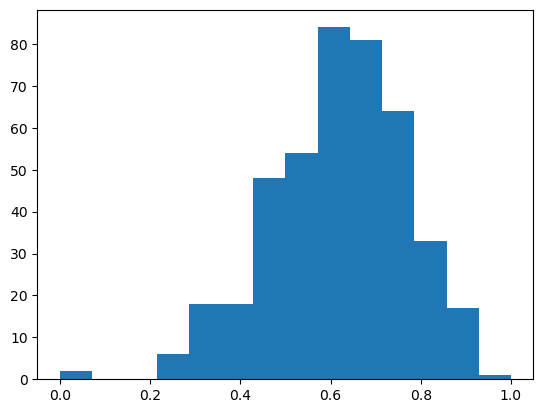

In [37]:
plt.hist(
    panda_for_cosine.cosine.values,
    bins=14,
    range=(0,1)
)

In [38]:
panda_for_cosine.cosine.mean()

0.6160115400780739

In [39]:
panda_for_cosine

,inchikey_first_block,measured_spectrum,spectrum_for_similarity_experimental,morgan_fingerprints,Short,quantum_spectrum,spectrum_with_ML_intensities,spectrum_for_similarity_quantum,cosine
0,UXTUIDNFTDLRIX,"[[15.0, 1.0], [26.0, 0.04604604604604605], [27...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.14], [28.0, 0.03], [29...","[[15.0, 0.14247579872608185], [27.0, 0.3212048...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.617704
1,UXTUIDNFTDLRIX,"[[15.0, 1.0], [26.0, 0.04604604604604605], [27...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",UXTUIDNFTDLRIX,"[[15.0, 0.06], [27.0, 0.27], [28.0, 0.02], [29...","[[15.0, 0.14129193127155304], [27.0, 0.2983780...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.557025
2,RGBVWCQARBEPPW,"[[25.0, 0.18218218218218218], [26.0, 1.0], [28...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",RGBVWCQARBEPPW,"[[26.0, 0.68], [27.0, 0.01], [53.0, 0.01], [54...","[[26.0, 0.17784947156906128], [27.0, 0.2421697...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.497176
3,WMYNMYVRWWCRPS,"[[25.0, 0.021021021021021023], [26.0, 0.133133...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",WMYNMYVRWWCRPS,"[[28.0, 0.01], [29.0, 1.0], [30.0, 0.02], [42....","[[28.0, 0.1693406105041504], [29.0, 0.45773354...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.515301
4,JNYASWYZHOGSHZ,"[[14.0, 0.12312312312312312], [15.0, 0.2812812...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",JNYASWYZHOGSHZ,"[[27.0, 0.22], [28.0, 0.08], [29.0, 0.39], [30...","[[27.0, 0.2673603594303131], [28.0, 0.34158965...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.626643
...,...,...,...,...,...,...,...,...,...
421,CERXFJHZAWSIBN,"[[39.0, 0.05905905905905906], [41.0, 0.1051051...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CERXFJHZAWSIBN,"[[29.0, 0.02], [40.0, 0.01], [41.0, 0.05], [42...","[[29.0, 0.10770106315612793], [40.0, 0.0216238...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.498335
422,QYZUXPQHBRUDQD,"[[39.0, 0.03403403403403404], [41.0, 0.1001001...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",QYZUXPQHBRUDQD,"[[27.0, 0.02], [28.0, 0.02], [29.0, 0.01], [39...","[[27.0, 0.10669956356287003], [28.0, 0.0509746...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.479107
423,XPMPUGVKPUCKNN,"[[27.0, 0.035035035035035036], [29.0, 0.030030...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",XPMPUGVKPUCKNN,"[[27.0, 0.02], [28.0, 0.02], [40.0, 0.03], [41...","[[27.0, 0.0640692263841629], [28.0, 0.11199124...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.475070
424,VWAIZPYLEYEEFK,"[[27.0, 0.026026026026026026], [29.0, 0.035035...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",VWAIZPYLEYEEFK,"[[39.0, 0.01], [40.0, 0.01], [45.0, 0.06], [65...","[[39.0, 0.29963722825050354], [40.0, 0.4215879...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.509377


In [40]:
# for index,series in panda_for_cosine.iterrows():
#     plt.stem(
#         range(501),
#         series['spectrum_for_similarity_experimental'],
#         markerfmt=" "
#     )
#     plt.stem(
#         range(501),
#         -1*series['spectrum_for_similarity_quantum'],
#         markerfmt=" "
#     )
#     plt.show()
#     hold=input('hold')

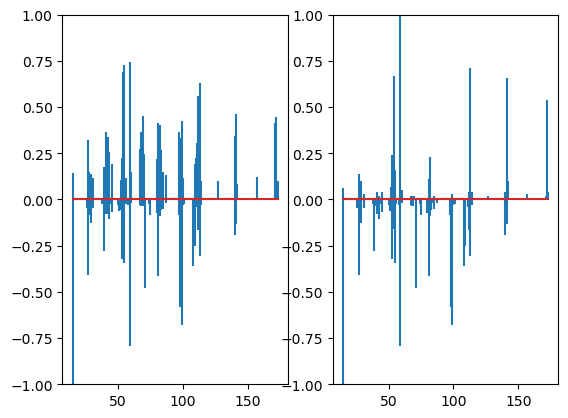

hold


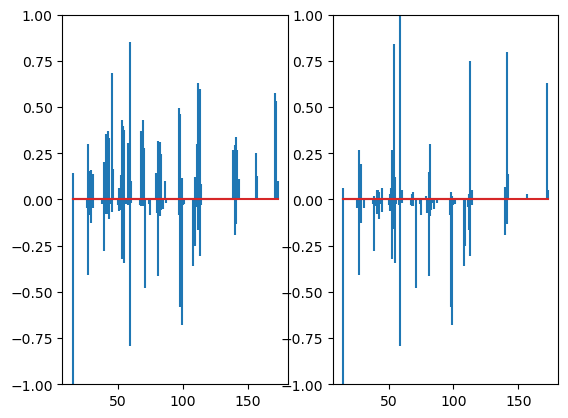

hold


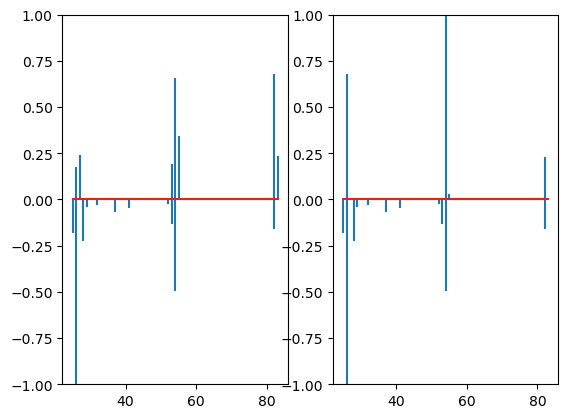

hold


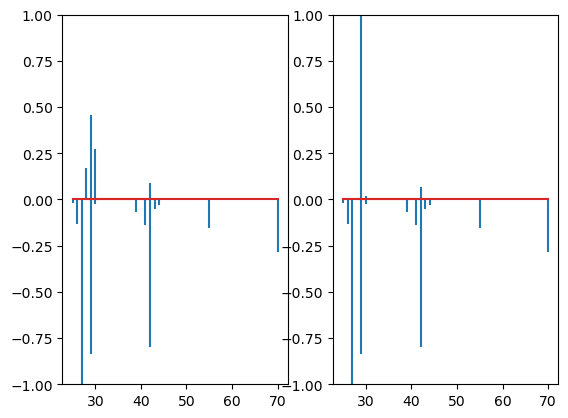

hold


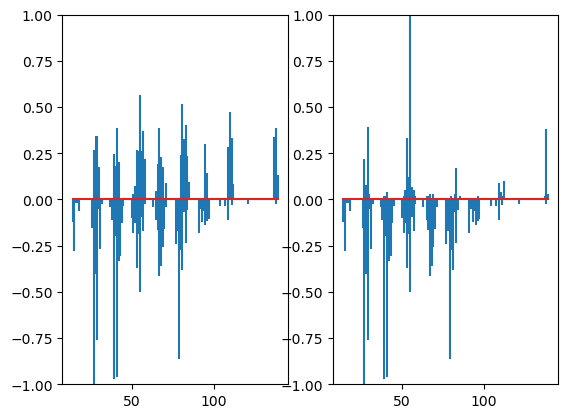

hold


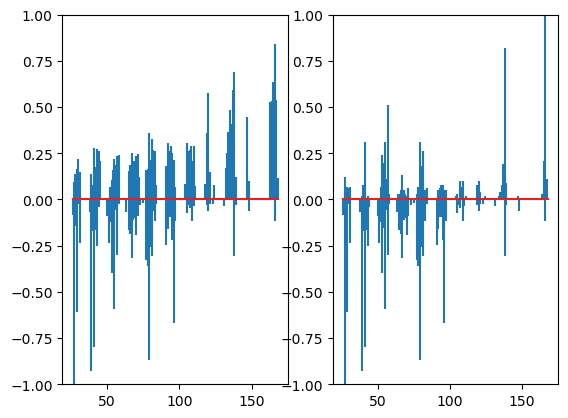

hold


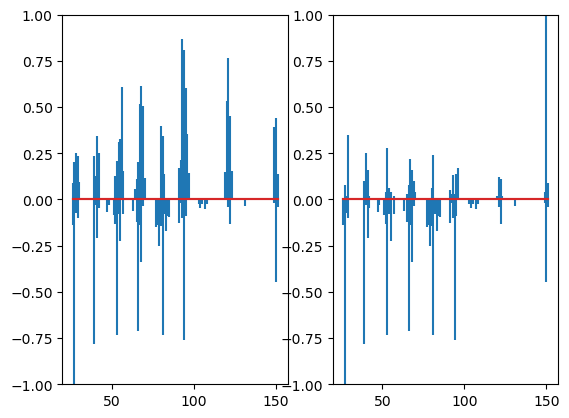

hold


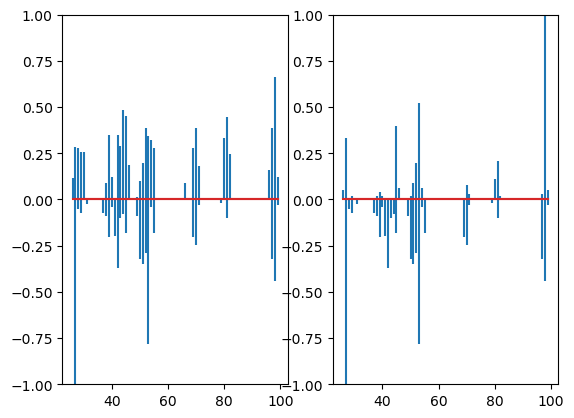

hold


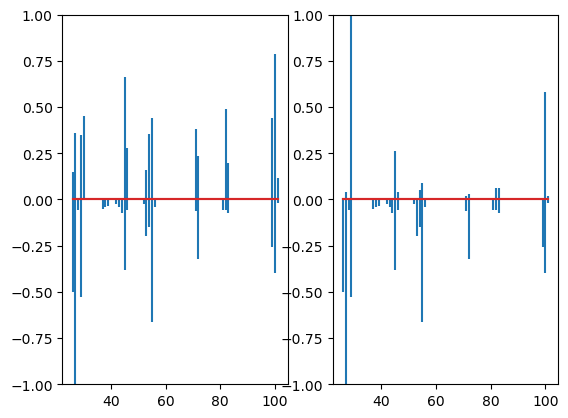

hold


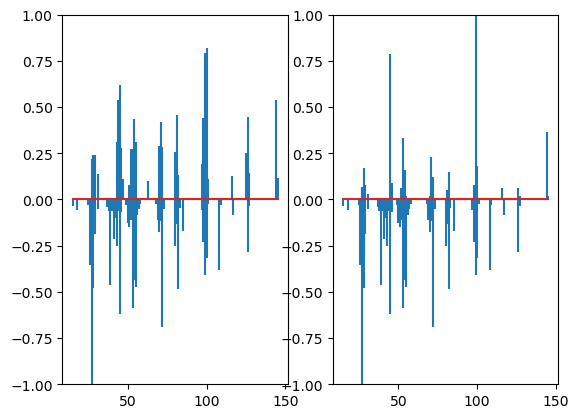

hold


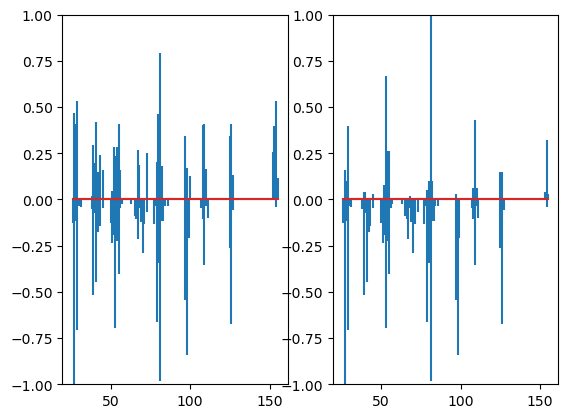

hold


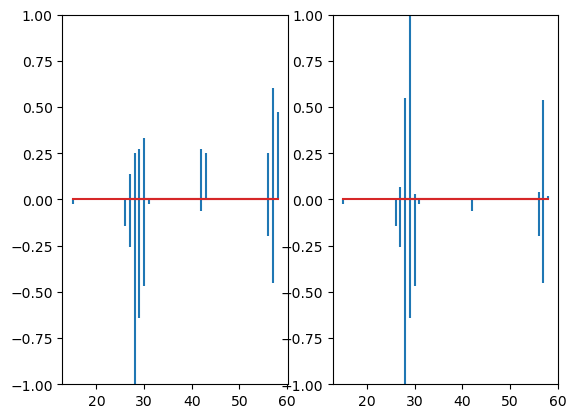

hold


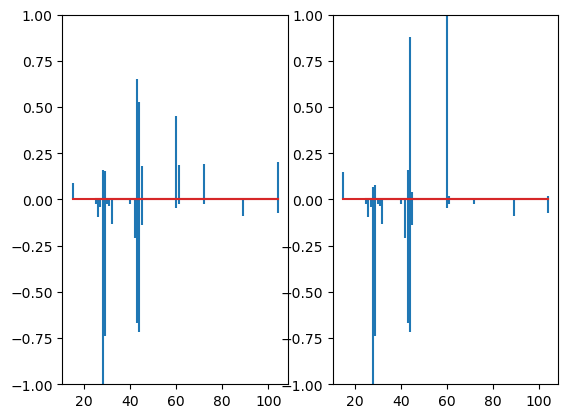

hold


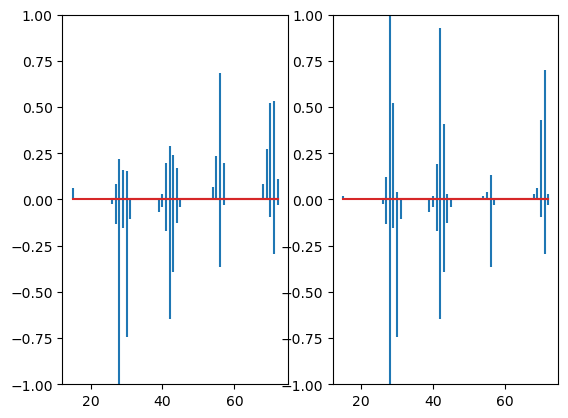

hold


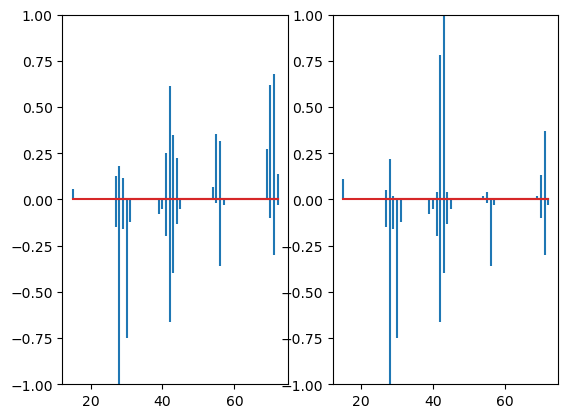

hold


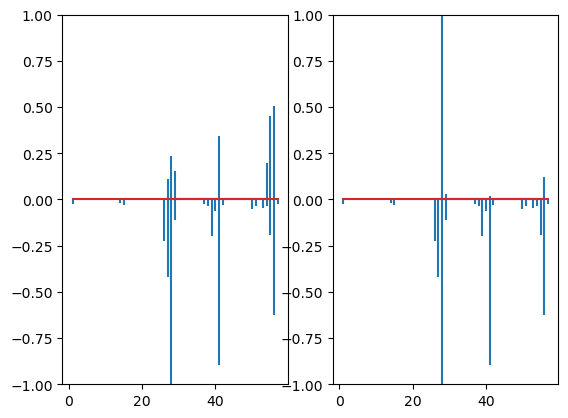

hold


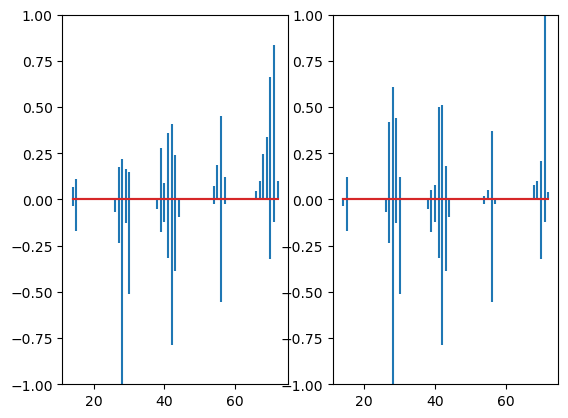

hold


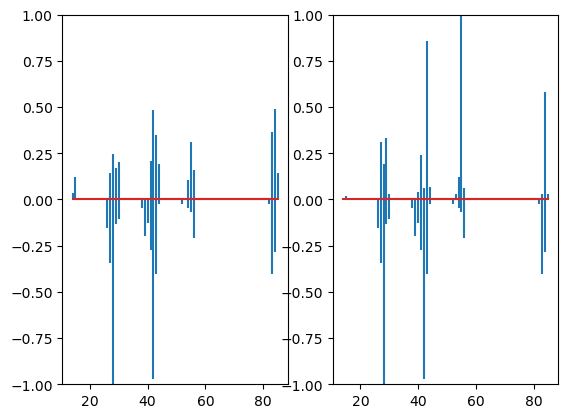

hold


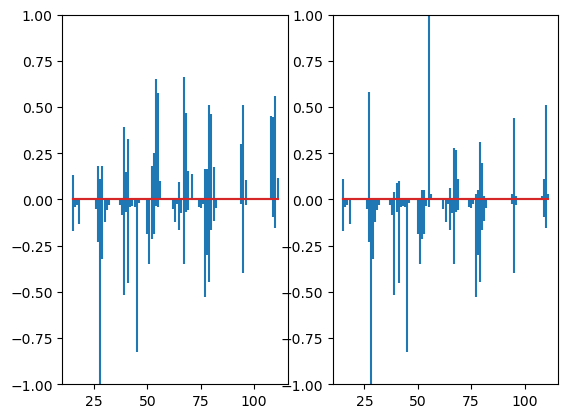

hold


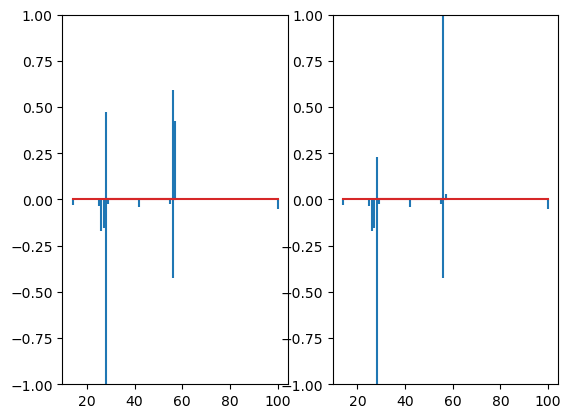

hold


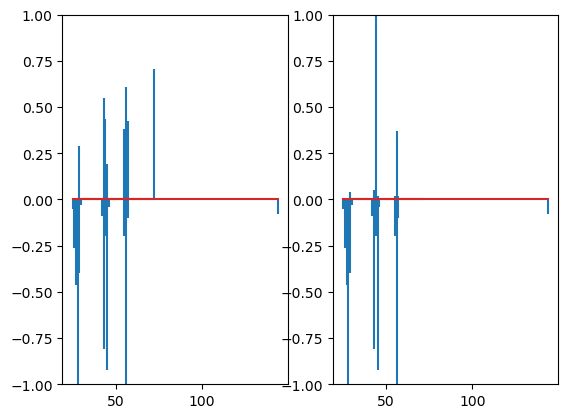

hold


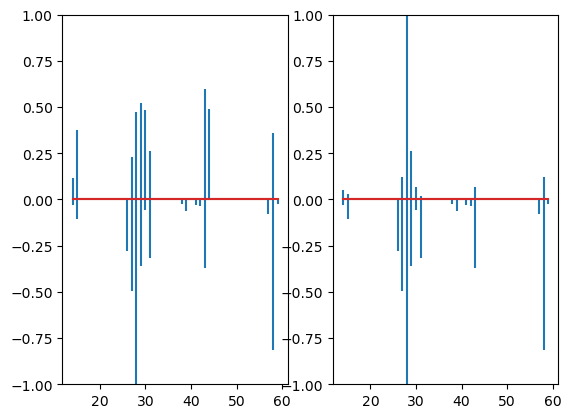

hold


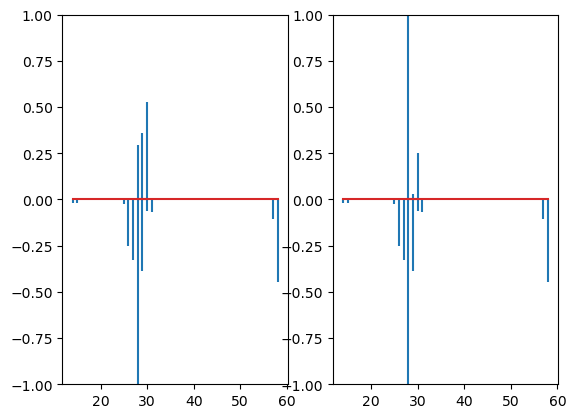

hold


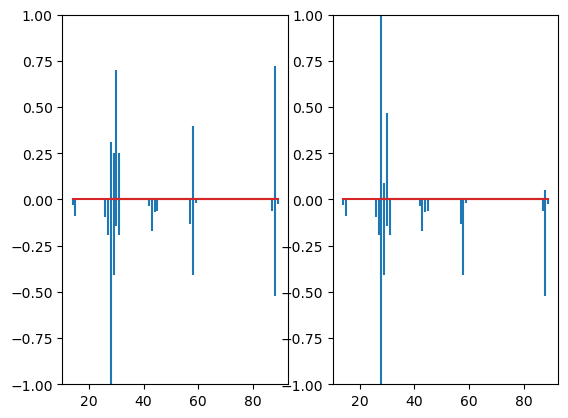

hold


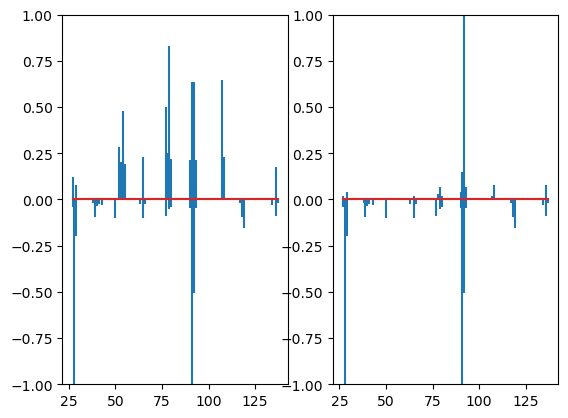

hold


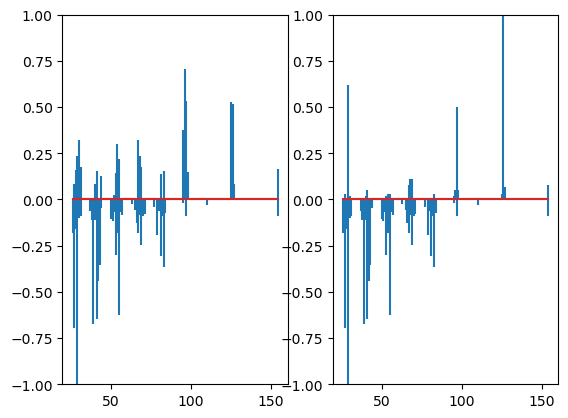

hold


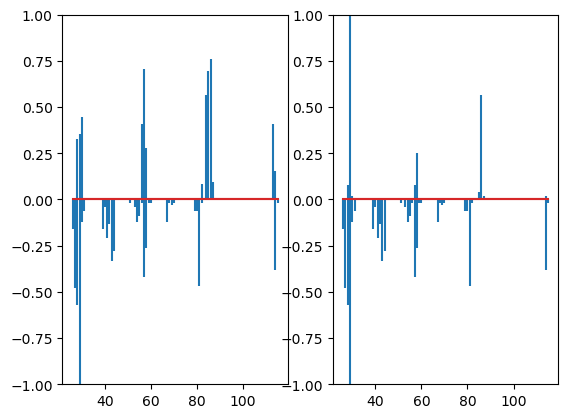

hold


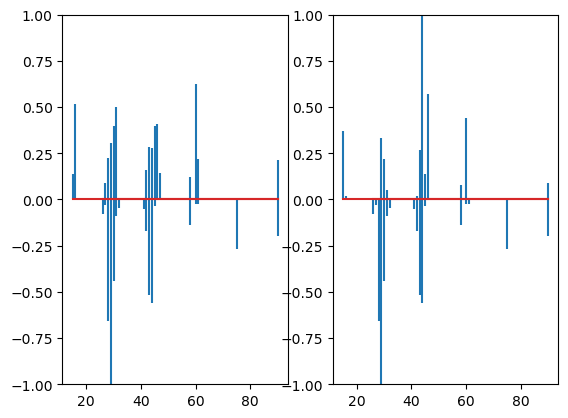

hold


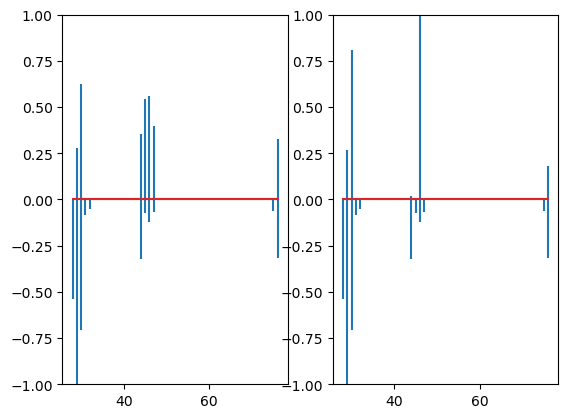

hold


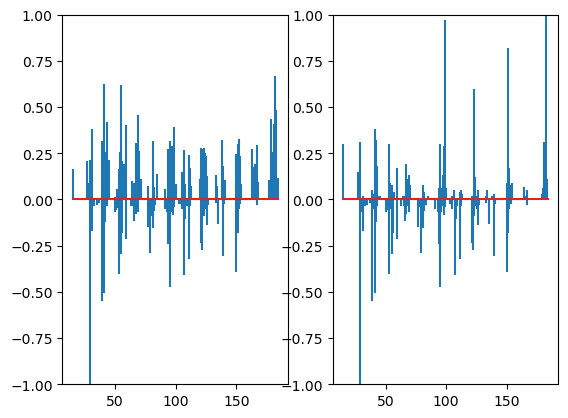

hold


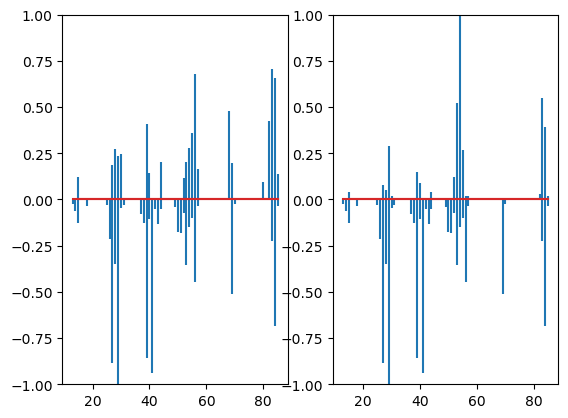

hold


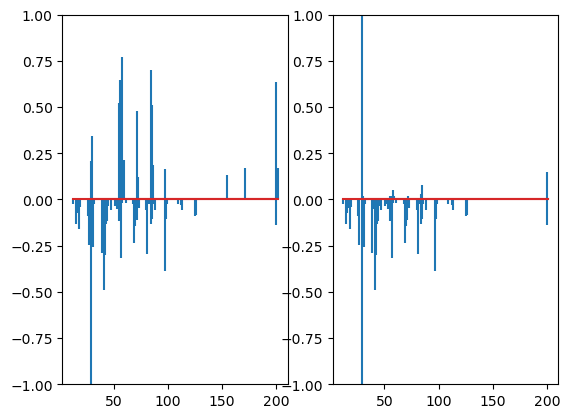

hold


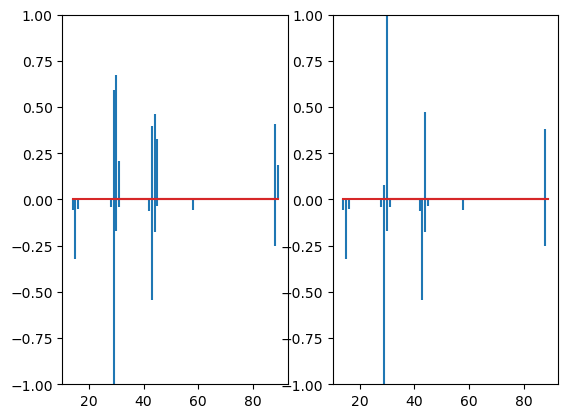

hold


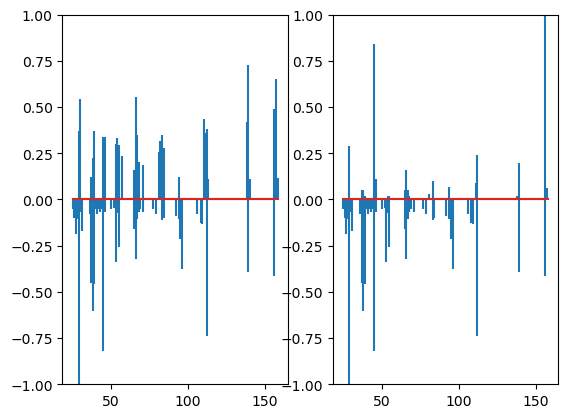

hold


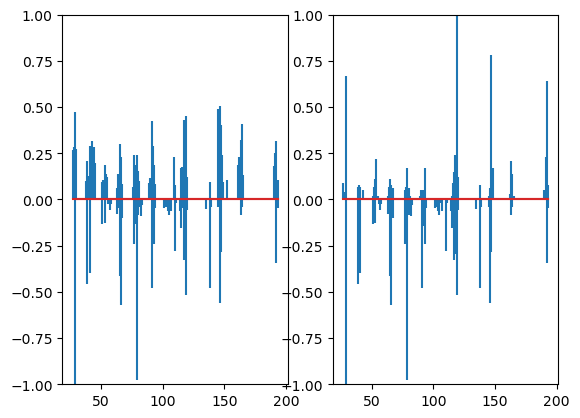

hold


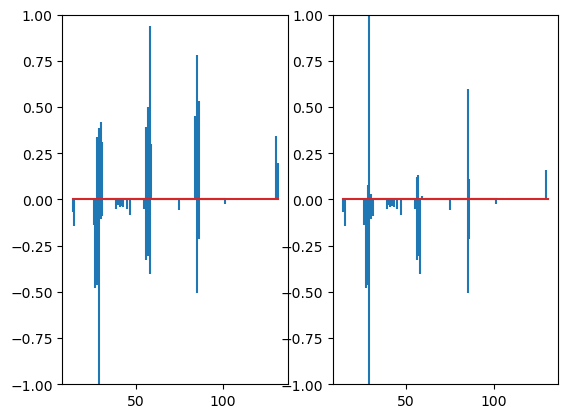

hold


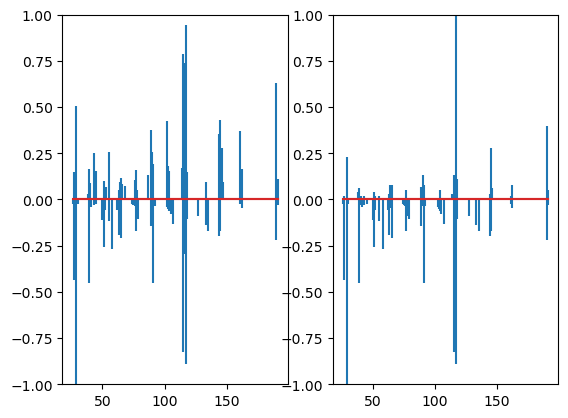

hold


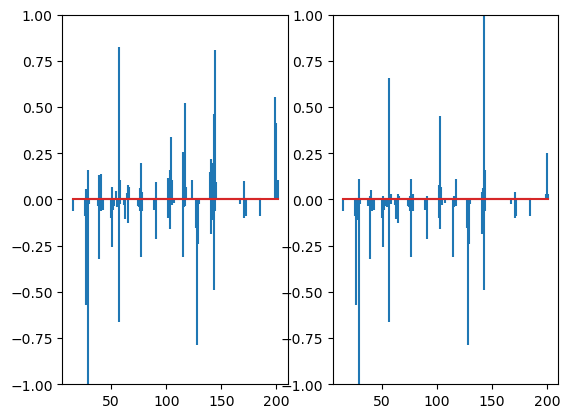

hold


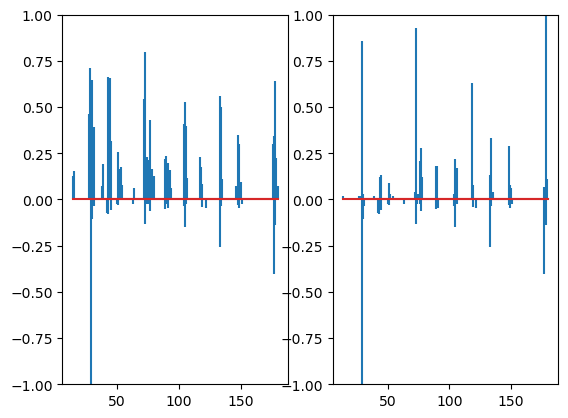

hold


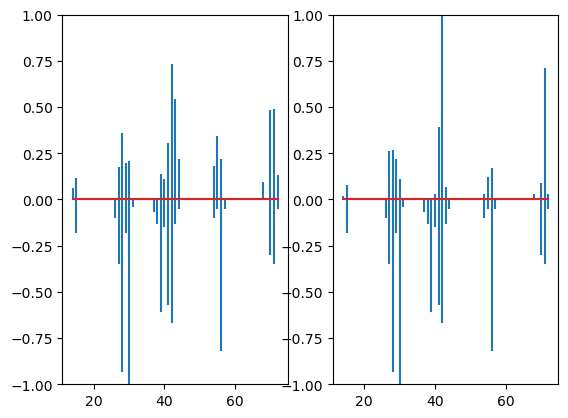

hold


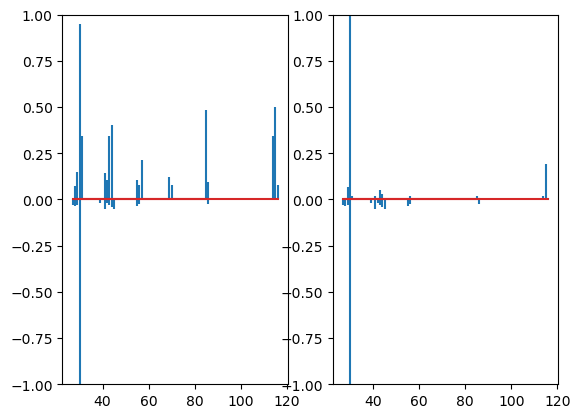

hold


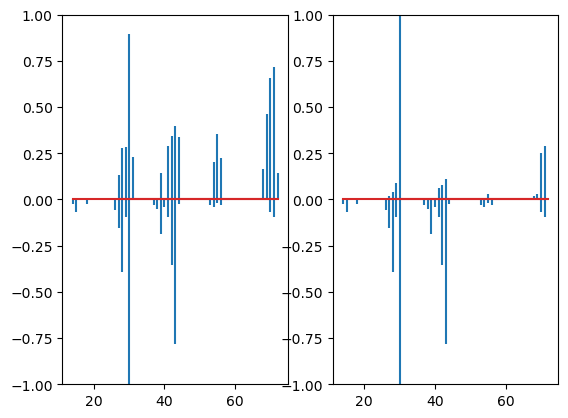

hold


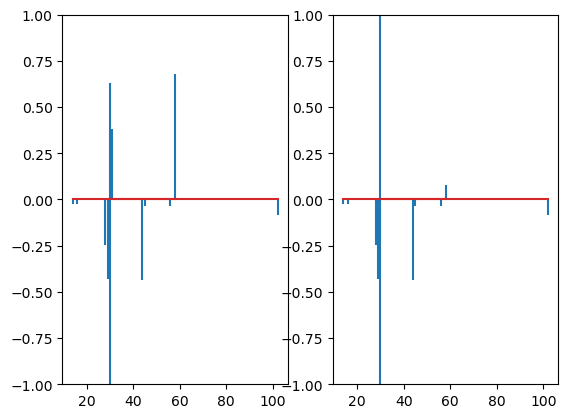

hold


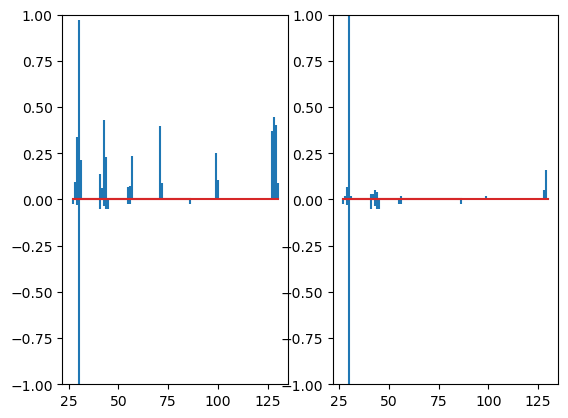

hold


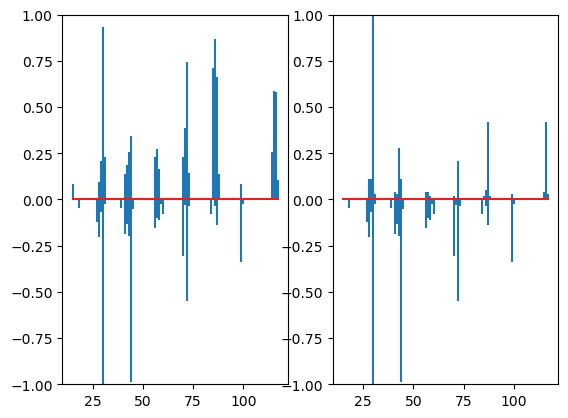

hold


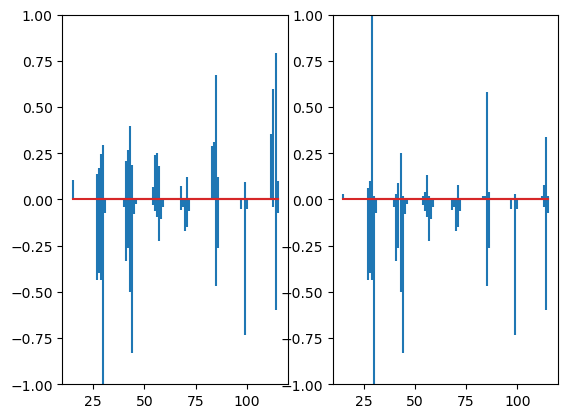

hold


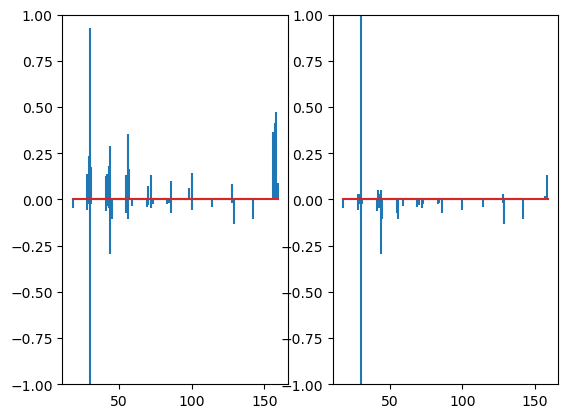

hold


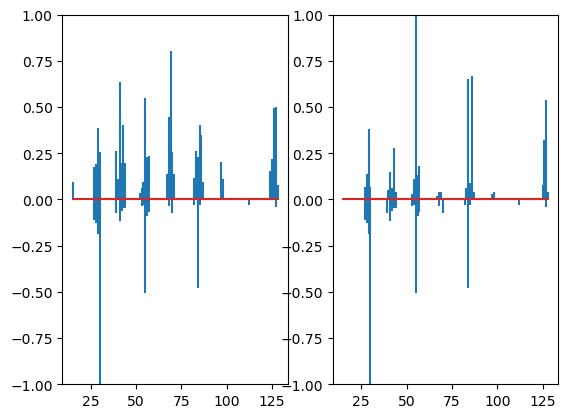

hold


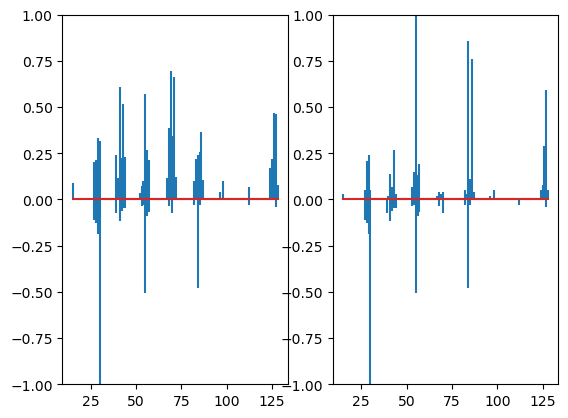

hold


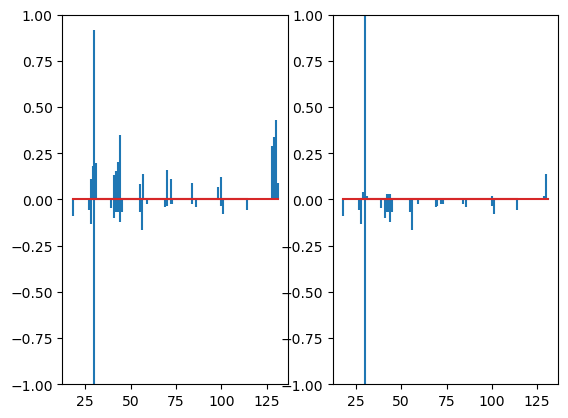

hold


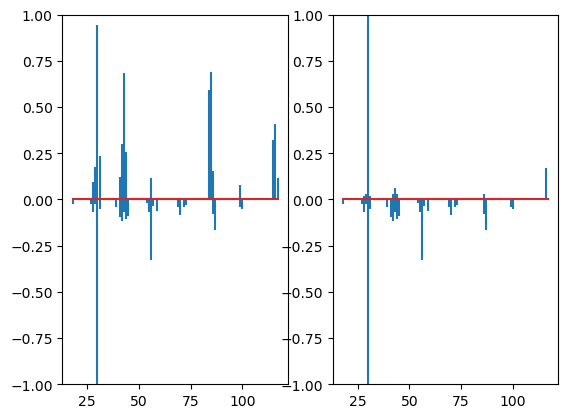

hold


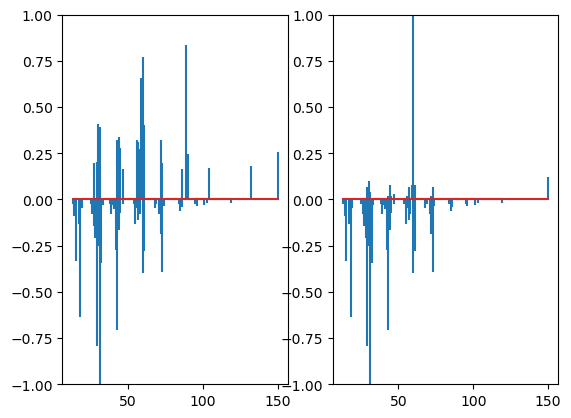

hold


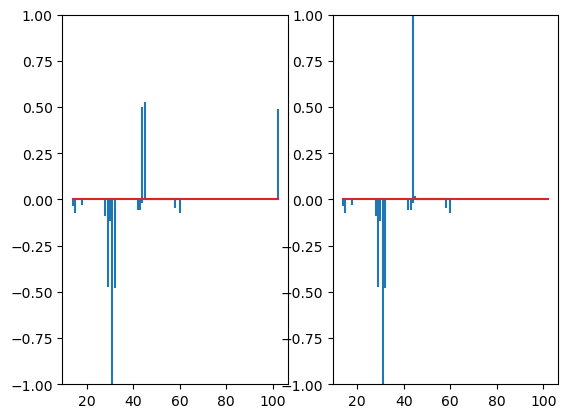

hold


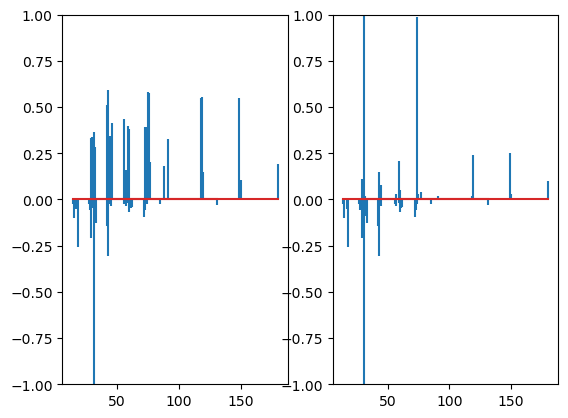

hold


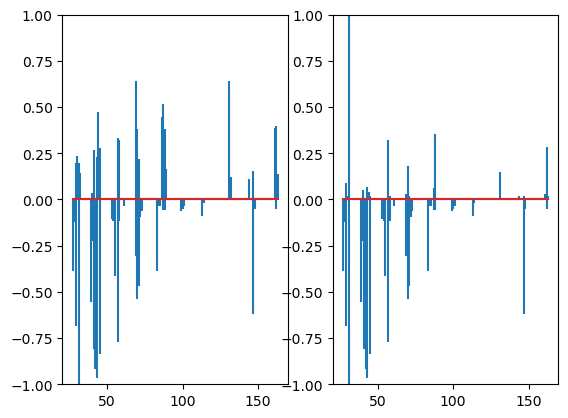

hold


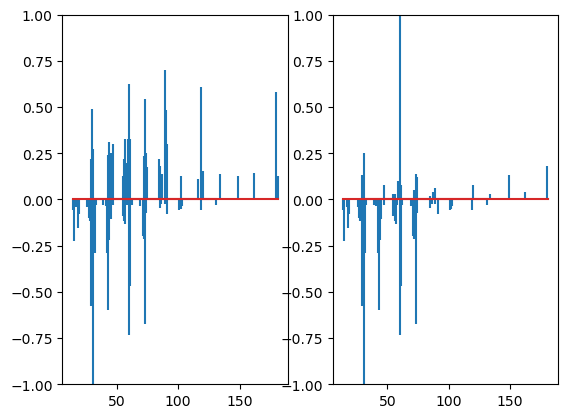

hold


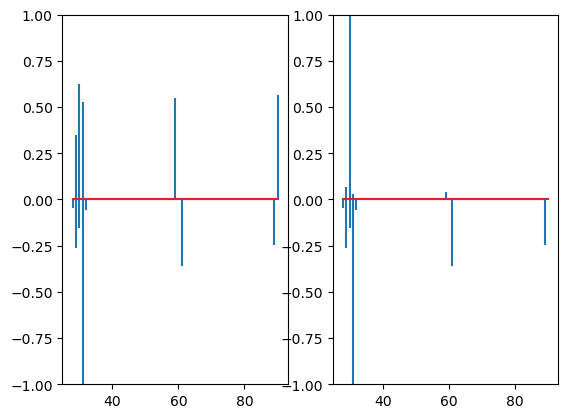

hold


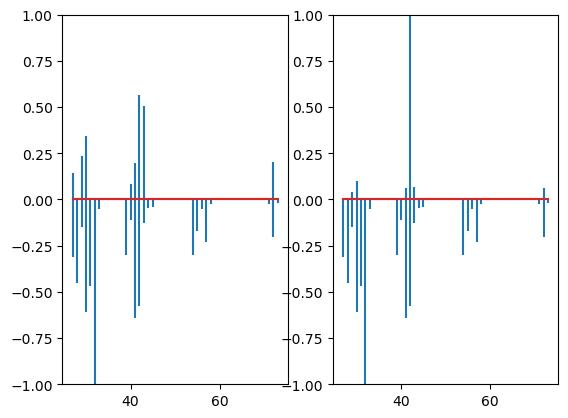

hold


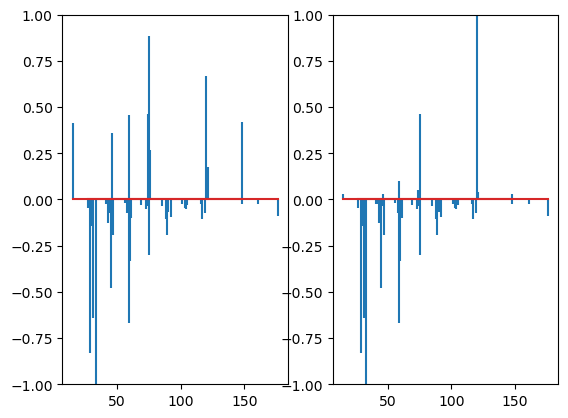

hold


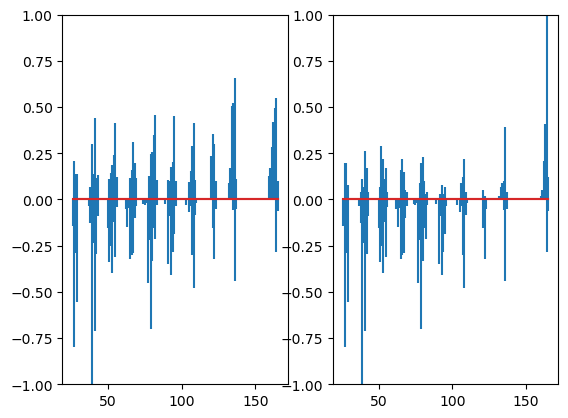

hold


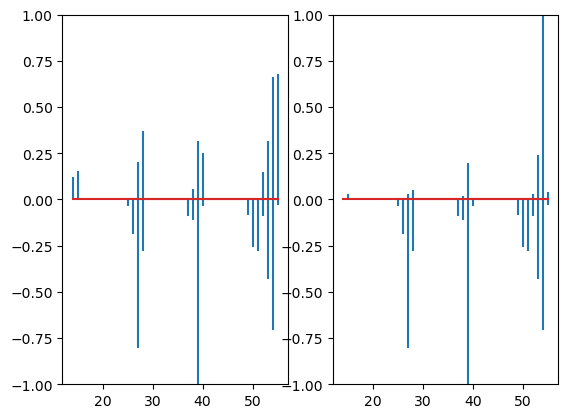

hold


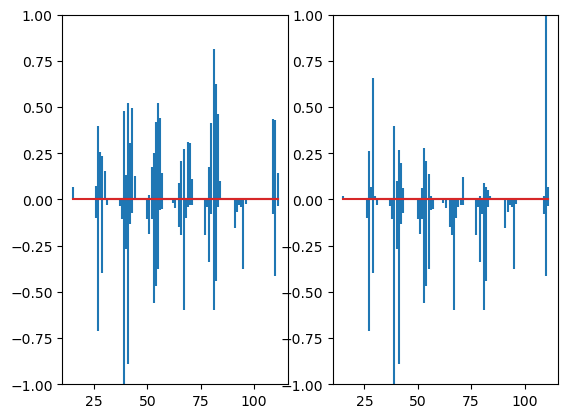

hold


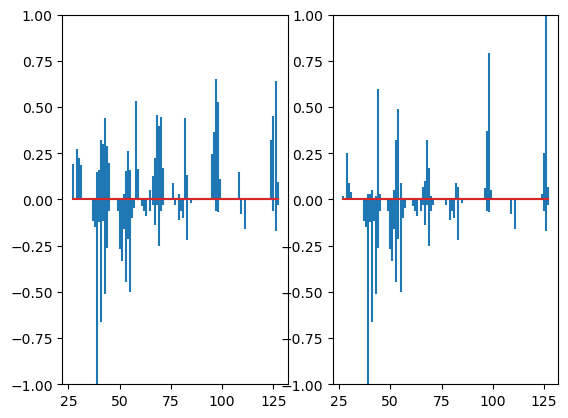

hold


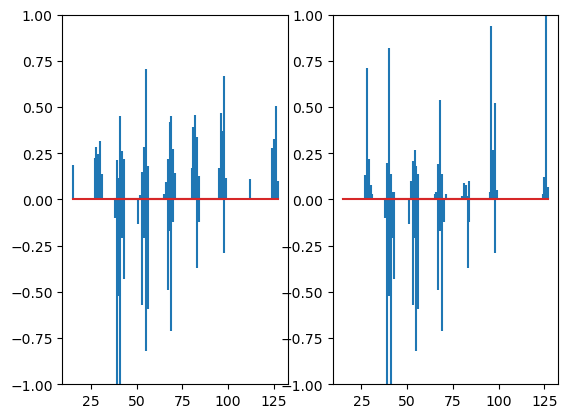

hold


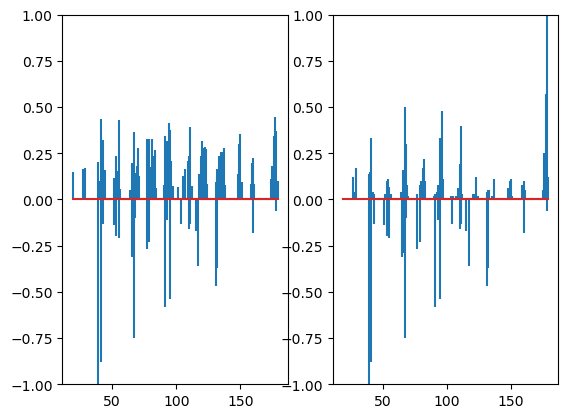

hold


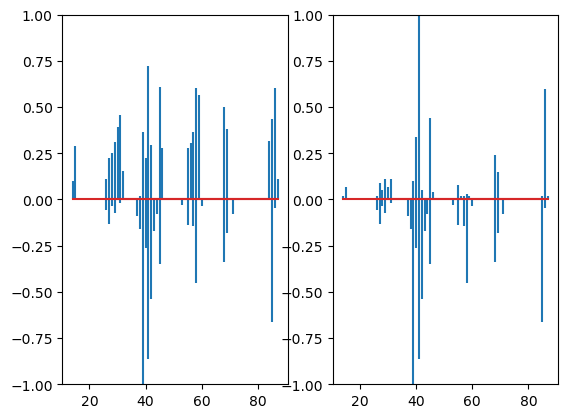

hold


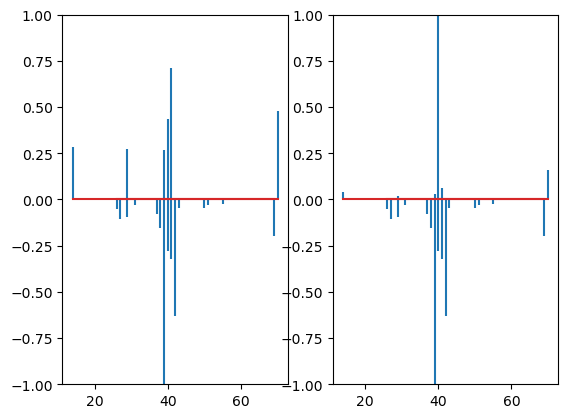

hold


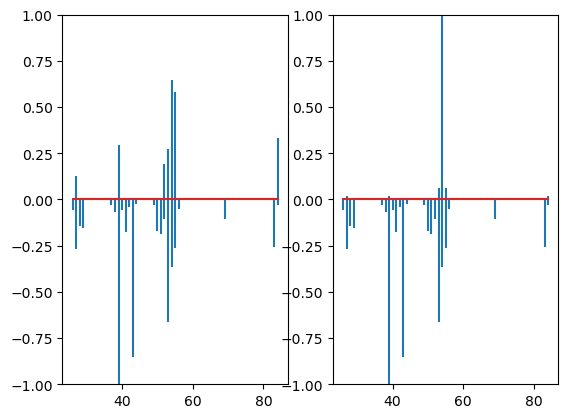

hold


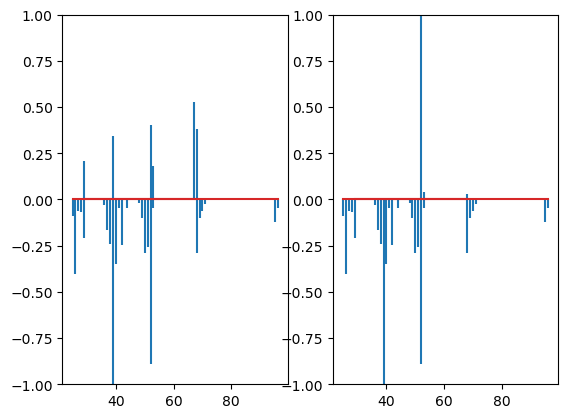

hold


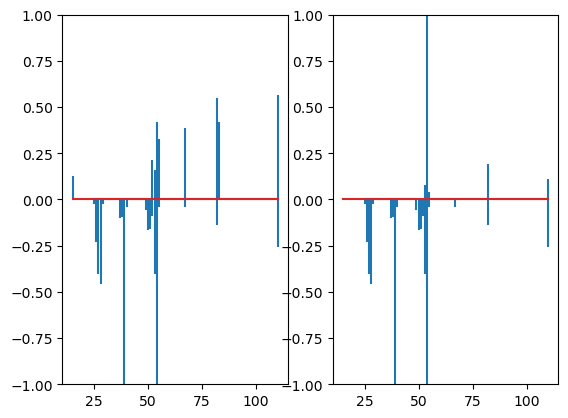

hold


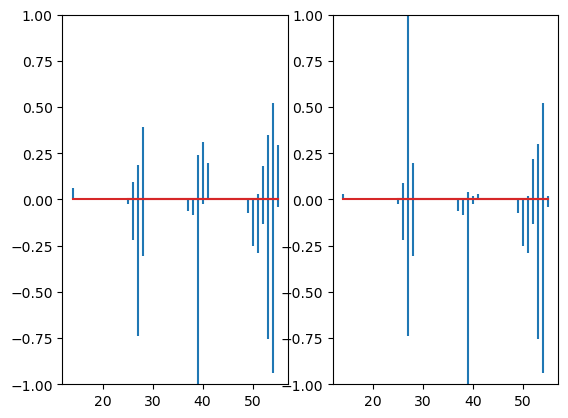

hold


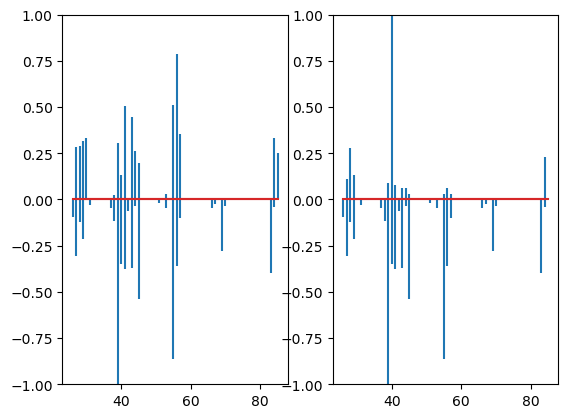

hold


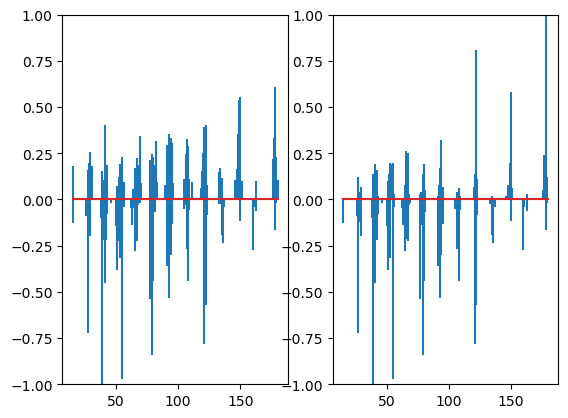

hold


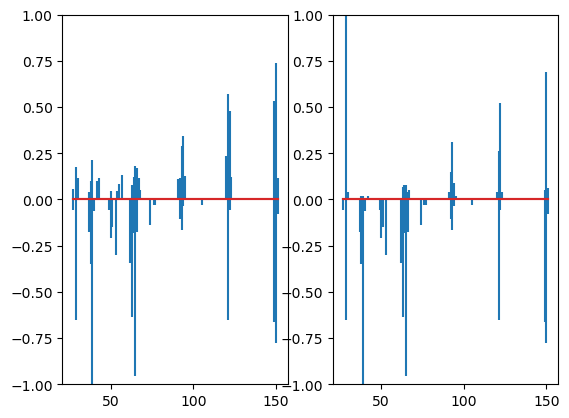

hold


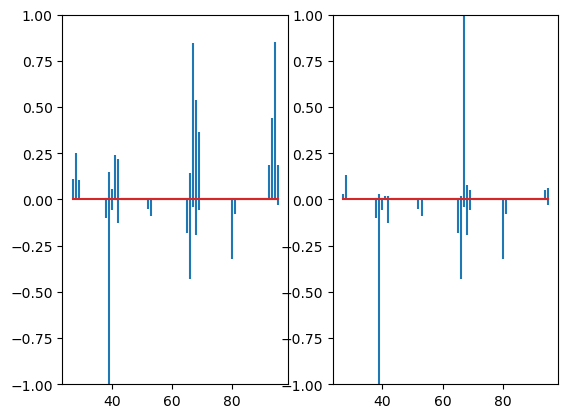

hold


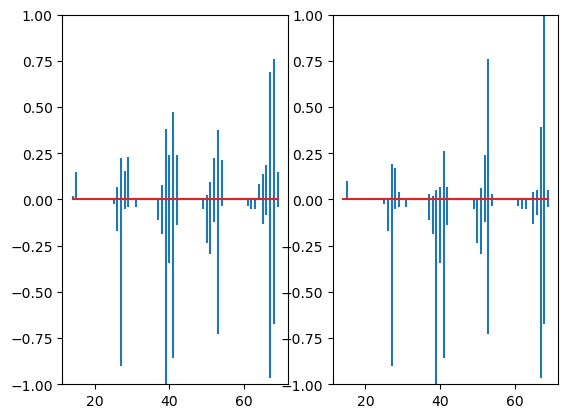

hold


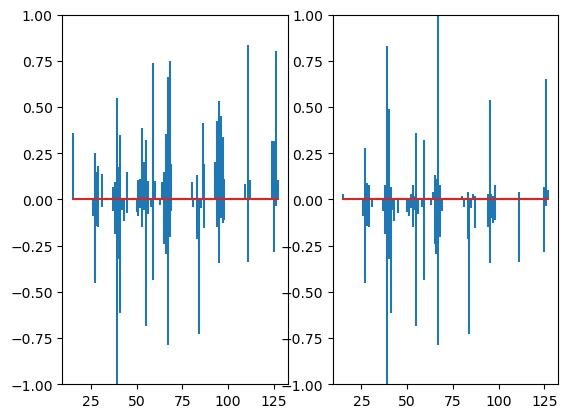

hold


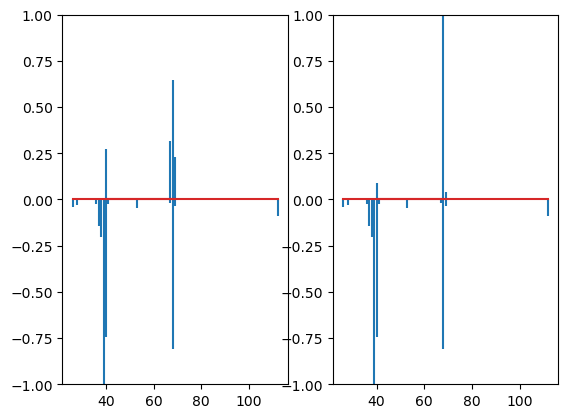

hold


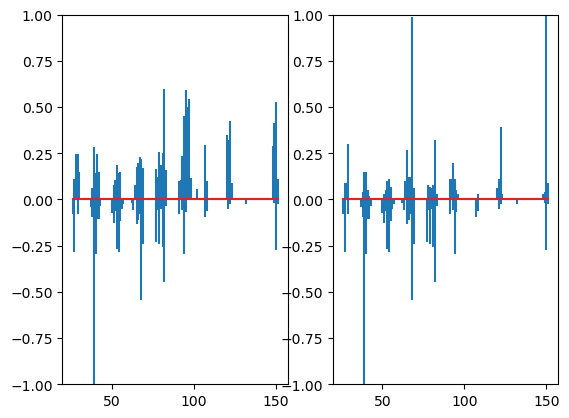

hold


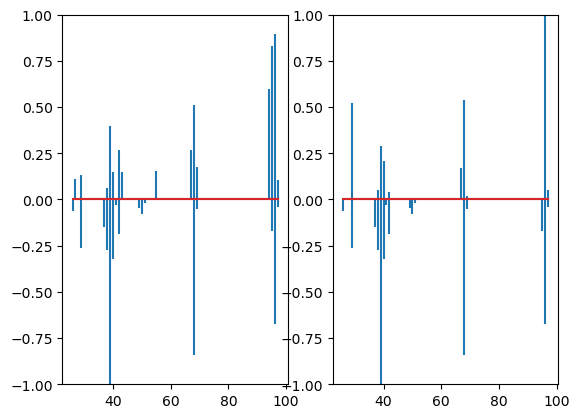

hold


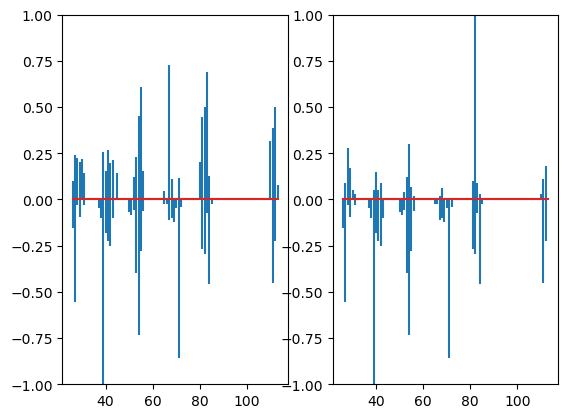

hold


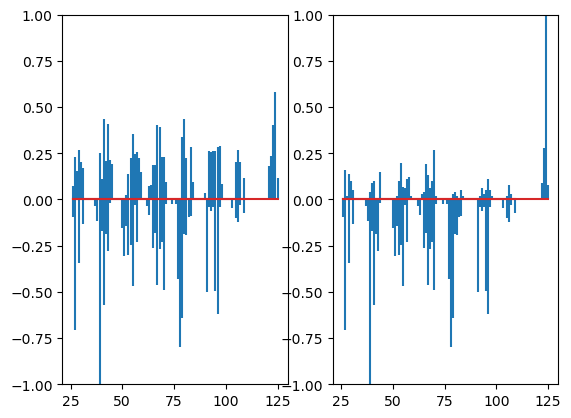

hold


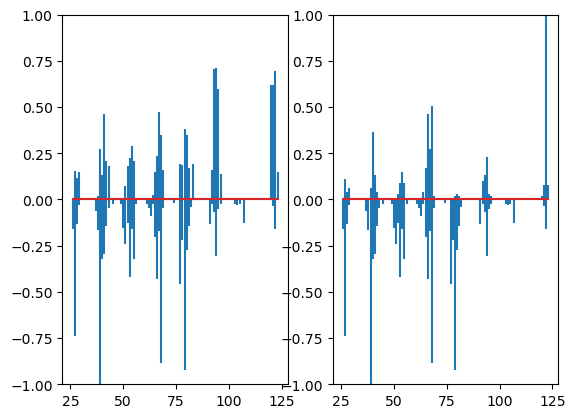

hold


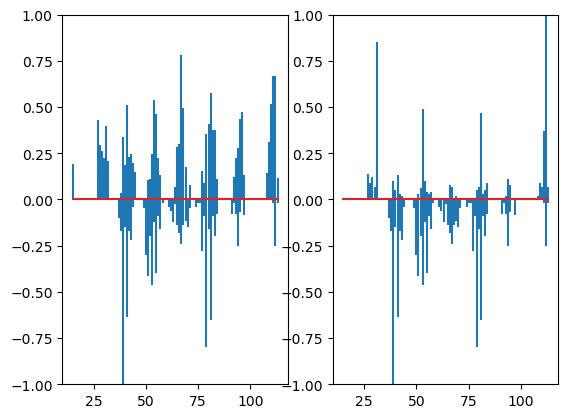

hold


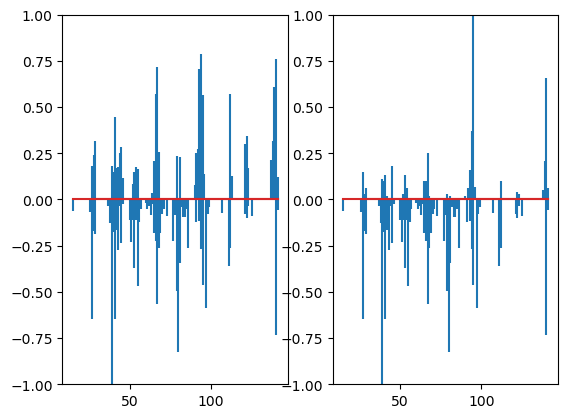

hold


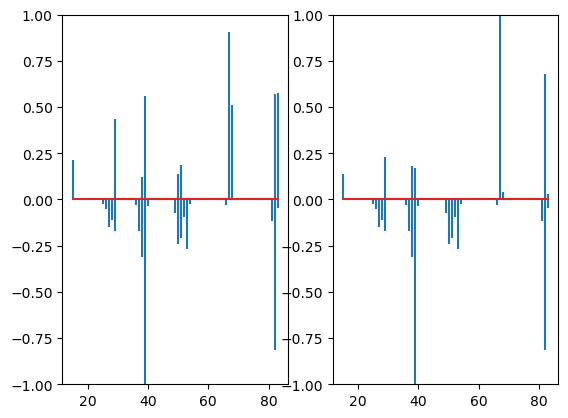

hold


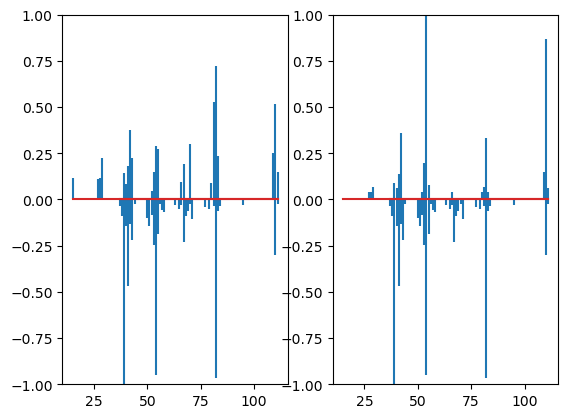

hold


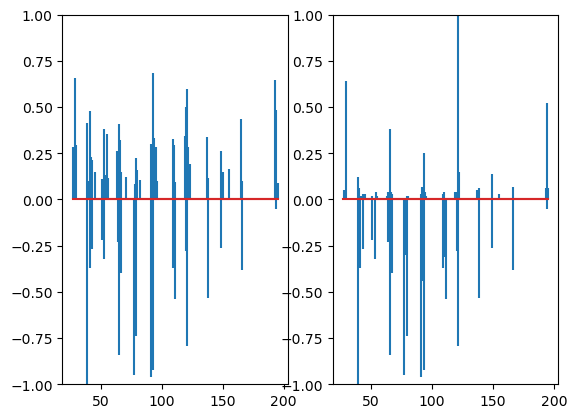

hold


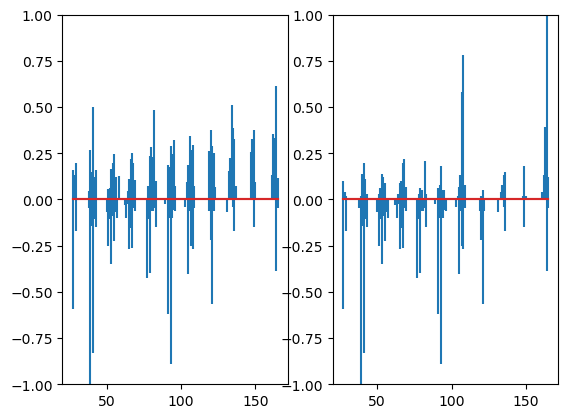

hold


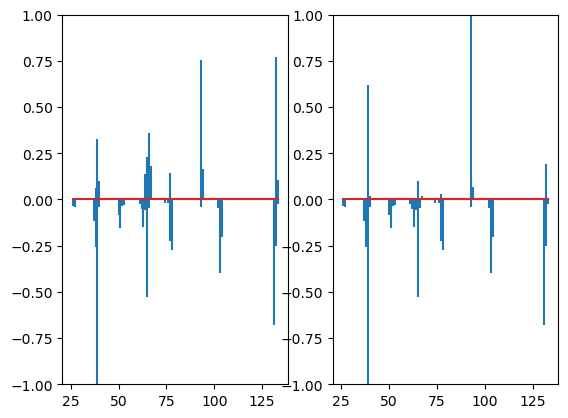

hold


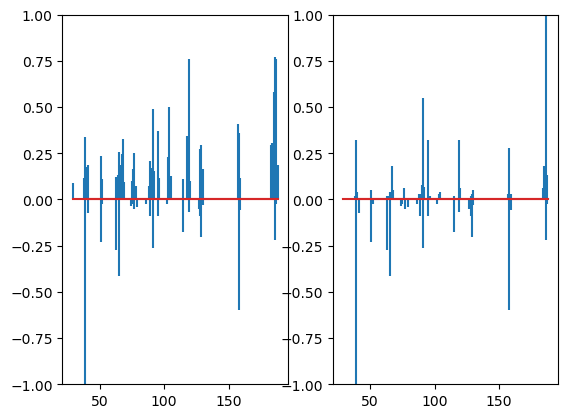

hold


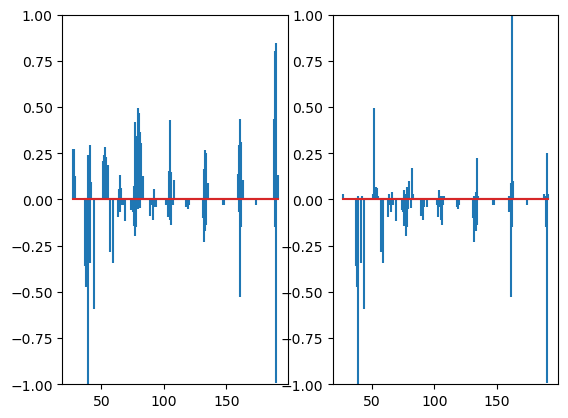

hold


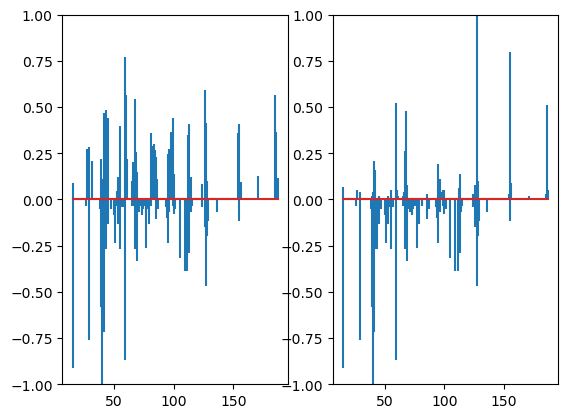

hold


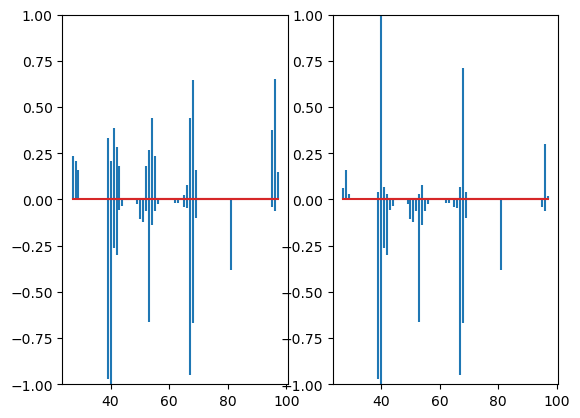

hold


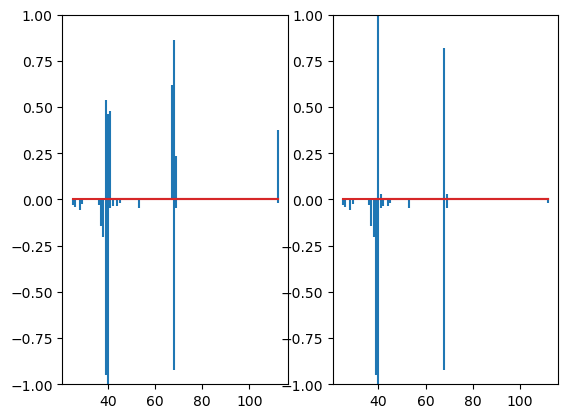

hold


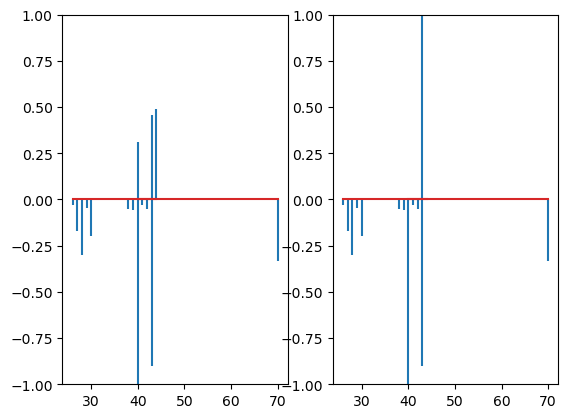

hold


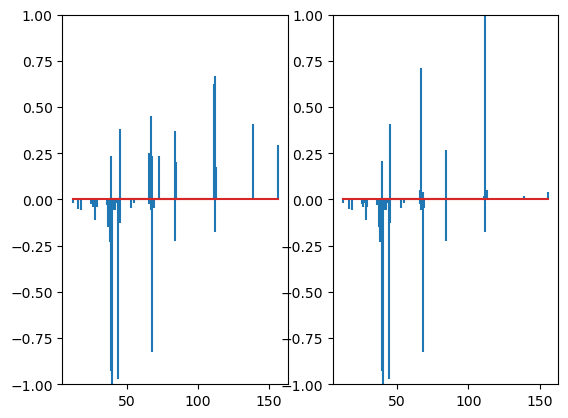

hold


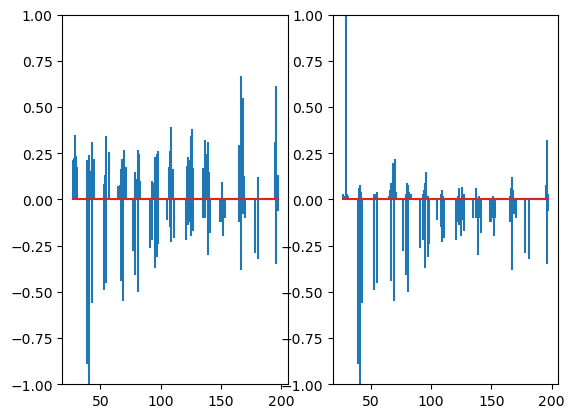

hold


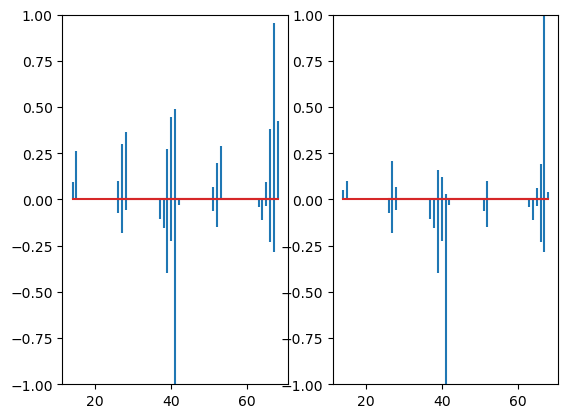

hold


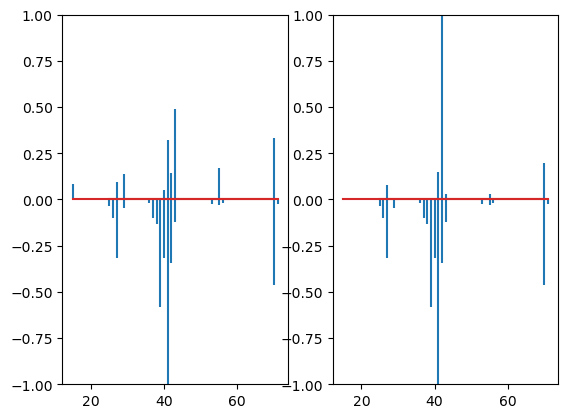

hold


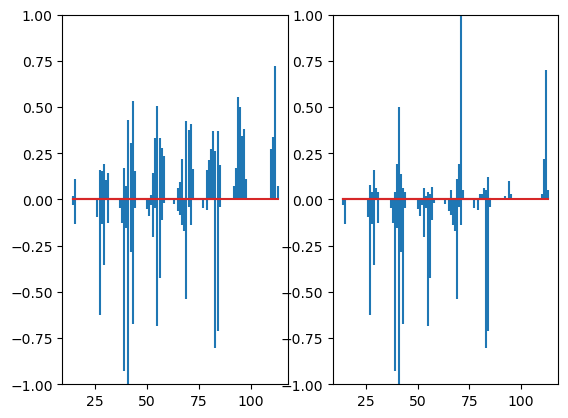

hold


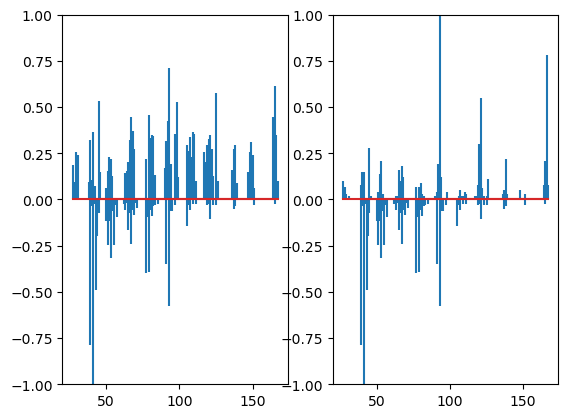

hold


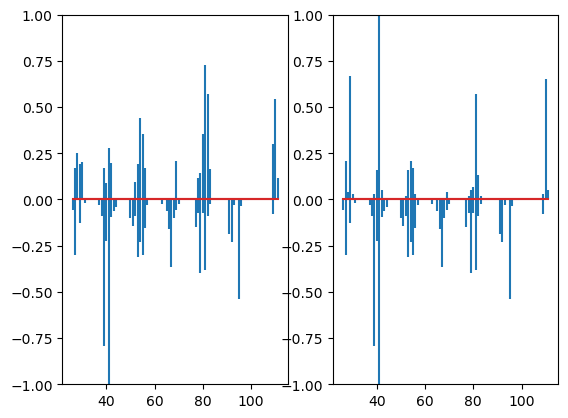

hold


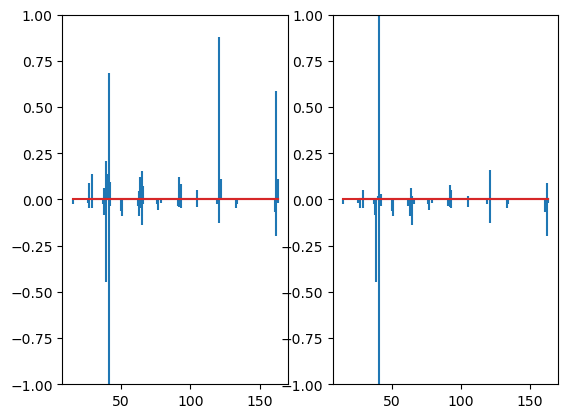

hold


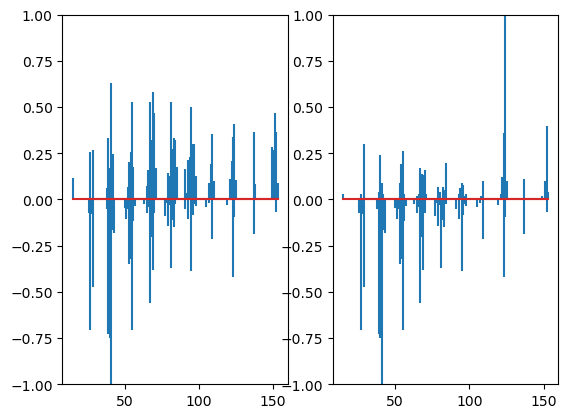

hold


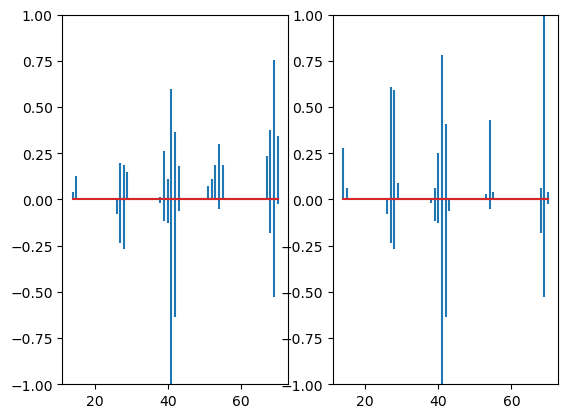

hold


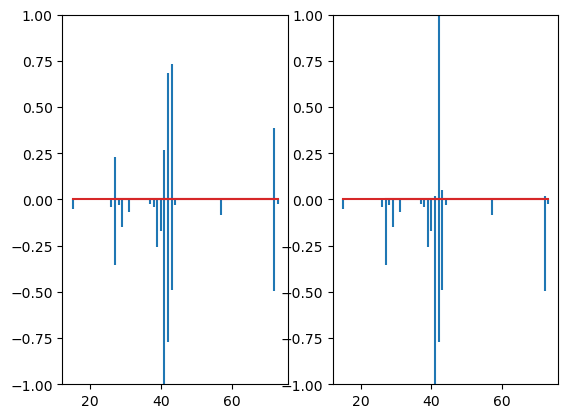

In [ ]:
for index,series in panda_for_cosine.iterrows():
    fig,ax=plt.subplots(1,2)
    ax[0].stem(
        series['measured_spectrum'][:,0],
        -1*series['measured_spectrum'][:,1],
        markerfmt=" "
    )
    ax[0].stem(
        series['spectrum_with_ML_intensities'][:,0],
        series['spectrum_with_ML_intensities'][:,1],
        markerfmt=" "
    )

    ax[1].stem(
        series['measured_spectrum'][:,0],
        -1*series['measured_spectrum'][:,1],
        markerfmt=" "
    )
    ax[1].stem(
        series['quantum_spectrum'][:,0],
        series['quantum_spectrum'][:,1],
        markerfmt=" "
    )    
    
    ax[0].set_ylim([-1,1])
    ax[1].set_ylim([-1,1])

    
    plt.show()
    hold=input('hold')